In [ ]:
# to save report:
    # clone the following repo: https://github.com/ihuston/jupyter-hide-code-html
    # run in terminal: jupyter nbconvert --to html --template jupyter-hide-code-html/clean_output.tpl path/to/CGR_16S_Microbiome_QC_Report.ipynb
    # name the above file NP###_pipeline_run_folder_QC_report.html and place it in the directory with the pipeline output
    
# for version control:
    # Kernel > Restart & Clear Output
    # run in terminal: jupyter nbconvert --to script CGR_16S_Microbiome_QC_Report.ipynb
    # add/commit CGR_16S_Microbiome_QC_Report.ipynb AND CGR_16S_Microbiome_QC_Report.py to git

# CGR 16S Microbiome QC Report

<!-- <div id="toc_container"> -->
<h2>Table of Contents</h2>
<ul class="toc_list">
  <a href="#1&nbsp;&nbsp;General-analysis-information">1&nbsp;&nbsp;General analysis information</a><br>
  <ul>
    <a href="#1.1&nbsp;&nbsp;Project-directory">1.1&nbsp;&nbsp;Project directory</a><br>
    <a href="#1.2&nbsp;&nbsp;Project-directory-contents">1.2&nbsp;&nbsp;Project directory contents</a><br>
    <a href="#1.3&nbsp;&nbsp;Parameters">1.3&nbsp;&nbsp;Parameters</a><br>
    <a href="#1.4&nbsp;&nbsp;Dependency-versions">1.4&nbsp;&nbsp;Dependency versions</a><br>
  </ul>
  <a href="#2&nbsp;&nbsp;Samples-included-in-the-project">2&nbsp;&nbsp;Samples included in the project<br>
  <a href="#3&nbsp;&nbsp;QC-checks">3&nbsp;&nbsp;QC checks</a><br>
  <ul>
    <a href="#3.1&nbsp;&nbsp;Read-trimming">3.1&nbsp;&nbsp;Read trimming</a><br>
    <a href="#3.2&nbsp;&nbsp;Proportion-of-non-bacterial-reads">3.2&nbsp;&nbsp;Proportion of non-bacterial reads<br>
    <ul>
      <a href="#3.2.1&nbsp;&nbsp;Proportion-of-non-bacterial-reads-per-sample-type">3.2.1&nbsp;&nbsp;Proportion of non-bacterial reads per sample type<br>
    </ul>
    <a href="#3.3&nbsp;&nbsp;Sequencing-depth-distribution-per-flow-cell">3.3&nbsp;&nbsp;Sequencing distribution per flow cell</a><br>
    <a href="#3.4&nbsp;&nbsp;Read-counts-after-filtering-in-blanks-vs.-study-samples">3.4&nbsp;&nbsp;Read counts after filtering in blanks vs. study samples</a><br>
    <a href="#3.5&nbsp;&nbsp;Sequential-sample--and-feature-based-filters">3.5&nbsp;&nbsp;Sequential sample- and feature-based filters</a><br>
    <a href="#3.6&nbsp;&nbsp;Biological-replicates">3.6&nbsp;&nbsp;Biological replicates</a><br>
    <a href="#3.7&nbsp;&nbsp;QC-samples">3.7&nbsp;&nbsp;QC samples</a><br>
  </ul>
  <a href="#4&nbsp;&nbsp;Rarefaction-threshold">4&nbsp;&nbsp;Rarefaction threshold</a><br>
  <a href="#5&nbsp;&nbsp;Alpha-diversity">5&nbsp;&nbsp;Alpha diversity</a><br>
  <a href="#6&nbsp;&nbsp;Beta-diversity">6&nbsp;&nbsp;Beta diversity</a><br>
  <ul>
    <a href="#6.1&nbsp;&nbsp;Bray-Curtis">6.1&nbsp;&nbsp;Bray-Curtis</a><br>
    <a href="#6.2&nbsp;&nbsp;Jaccard">6.2&nbsp;&nbsp;Jaccard</a><br>
    <a href="#6.3&nbsp;&nbsp;Weighted-UniFrac">6.3&nbsp;&nbsp;Weighted UniFrac</a><br>
    <a href="#6.4&nbsp;&nbsp;Unweighted-UniFrac">6.4&nbsp;&nbsp;Unweighted UniFrac</a><br>
  </ul>
</ul>

In [ ]:
# allow user definition of column headers for certain things, eg sample type?

<h2 id="1&nbsp;&nbsp;General-analysis-information">1&nbsp;&nbsp;General analysis information</h2>

<h3 id="1.1&nbsp;&nbsp;Project-directory">1.1&nbsp;&nbsp;Project directory</h3>

All production microbiome projects are located in `/DCEG/Projects/Microbiome/Analysis/`.  There is a parent folder named with the project ID; that folder contains the [bioinformatic pipeline](https://github.com/NCI-CGR/QIIME_pipeline) runs for that project and a `readme` summarizing the changes between each run.  

- The initial run (always named `<datestamp>_initial_run`) is used for some QC checks and to evaluate parameter settings.  
- The second run implements additional read trimming and excludes water blanks, no-template controls, and QC samples (e.g. robogut or artificial colony samples).  (NOTE: pick one of intentional dups?)
- Additional runs are performed for study-specific reasons which are summarized in the `readme`.
<br><br>

__The project and pipeline run described in this report is located here:__

In [1]:
proj_dir='/Volumes/Analysis/Project_32789/run_041723'
ref_db='silva-132-99-515-806-nb-classifier'

In [2]:
%cd {proj_dir}

/Volumes/Analysis/Project_32789/run_041723


The contents of the `readme`, at the time of report generation:

<h3 id="1.2&nbsp;&nbsp;Project-directory-contents">1.2&nbsp;&nbsp;Project directory contents</h3>

In [3]:
!ls

bacteria_only                          manifests
denoising                              phylogenetics
diversity_core_metrics                 read_feature_and_sample_filtering
fastqs                                 run_times
import_and_demultiplex                 taxonomic_classification
logs                                   taxonomic_classification_bacteria_only


<h3 id="1.3&nbsp;&nbsp;Parameters">1.3&nbsp;&nbsp;Parameters</h3>

In [4]:
!cat ../*.y[a]*ml

# CGR QIIME2 pipeline for microbiome analysis.
# 
# AUTHORS:
#     S. Sevilla Chill
#     W. Zhou
#     B. Ballew
#     Y. Wan

## Manifest
metadata_manifest: '/DCEG/Projects/Microbiome/Analysis/Project_32789/new_manifest.txt'

## Directories
out_dir: '/DCEG/Projects/Microbiome/Analysis/Project_32789/run_041723'
exec_dir: '/DCEG/Projects/Microbiome/Analysis/Project_32789/QIIME_pipeline'
fastq_abs_path: '/DCEG/CGF/Sequencing/Illumina/MiSeq/PostRun_Analysis/Data/'  # internal runs only
temp_dir: '/scratch/wany'

## Run type
data_source: 'external'  # 'external' or 'internal' (to CGR)
  # for external data, require an additional metadata columns called "fq1" and "fq2" with full path and file names for R1 and R2 fastqs (do they need to be zipped?)

## QIIME version
qiime2_version: '2019.1'  # 2017.11 or 2019.1

## Analysis parameters
dada2_denoise:
  trim_left_forward: 0
  trim_left_reverse: 0
  truncate_length_forward: 0
  truncate_length_reverse: 0
  min_fold_parent_over_abundance: 2.0
p

<h2 id="2&nbsp;&nbsp;Samples-included-in-the-project">2&nbsp;&nbsp;Samples included in the project</h2>

The tables below show the count of samples grouped by metadata provided in the manifest.

In [5]:
from IPython.display import display
import os.path
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import glob
from skbio.stats.ordination import pcoa
from skbio import DistanceMatrix
import ssl

# Specify the path to the SSL certificate file
ssl._create_default_https_context = ssl._create_unverified_context

sns.set(style="whitegrid")

In [6]:
manifest = pd.read_csv(glob.glob('../manifest_report.txt')[0],sep='\t',index_col=0)
manifest.columns = map(str.lower, manifest.columns)
manifest = manifest.dropna(how='all', axis='columns')
manifest.columns = manifest.columns.str.replace(' ', '')  # remove once cleaning is implemented in the pipeline

In [7]:
if len(manifest['run-id'].astype(str).str.split('_',n=2,expand=True).columns) > 1:
    manifest['Sequencer'] = (manifest['run-id'].astype(str).str.split('_',n=2,expand=True))[1]
else:
    print("Can not infer sequencer ID from run ID.")
    
if 'sourcepcrplate' in manifest.columns:
    manifest['PCR_plate'] = (manifest['sourcepcrplate'].str.split('_',n=1,expand=True))[0]
else:
    print("Source PCR Plate column not detected in manifest.")
# should probably save this file, or even better, include in original manifest prior to analysis....

In [8]:
m = manifest.drop(columns=['externalid','sourcepcrplate','project-id','extractionbatchid','fq1','fq2'],errors='ignore')
# when do we want to drop extraction ID?  in this case, it's all unique values for QC samples and NaNs for study samples
# possibly look for (# unique values == # non-nan values) instead of alßways dropping

for i in m.columns:
    display(m[i].value_counts().rename_axis(i).to_frame('Number of samples'))

Number of samples
sampletype                         
Study                           526
artificialcolony                 14
PCRNTCBlank                       6
robogut                           6
PCRWaterBlank                     6
ExtractionBlank                   4

Number of samples
run-id                                               
230327_M01354_0080_000000000-KWFW4                192
230327_M03599_0231_000000000-KW8P8                192
230329_M01354_0081_000000000-KY5CG                178

Number of samples
metadata                   
5P                      281
PT2                     281

Number of samples
Sequencer                   
M01354                   370
M03599                   192

Number of samples
PCR_plate                   
PC87019                   96
PC87112                   96
PC87021                   96
PC87116                   96
PC87113                   89
PC87117                   89

<h2 id="3&nbsp;&nbsp;QC-checks">3&nbsp;&nbsp;QC checks</h2>

<h3 id="3.1&nbsp;&nbsp;Read-trimming">3.1&nbsp;&nbsp;Read trimming</h3>

The trimming parameters for the initial pipeline run (`<datestamp>_initial_run`) are set to 0 (no trimming).  For subsequent runs, trimming parameters are set based on the read quality plots (not shown here; please browse `import_and_demultiplex/<runID>.qzv` using [QIIME's viewer](https://view.qiime2.org/) for quality plots).  For this run, trimming parameters (also found in the config) are as follows:

In [9]:
!grep -A4 "dada2_denoise" ../*.y[a]*ml

dada2_denoise:
  trim_left_forward: 0
  trim_left_reverse: 0
  truncate_length_forward: 0
  truncate_length_reverse: 0


<h3 id="3.2&nbsp;&nbsp;Proportion-of-non-bacterial-reads">3.2&nbsp;&nbsp;Proportion of non-bacterial reads</h3>

After error correction, chimera removal, removal of phiX sequences, and the four-step filtering defined above, the remaining reads are used for taxonomic classification.  We are performing classification with a naive Bayes classifier trained on the SILVA 99% OTUs database that includes only the V4 region (defined by the 515F/806R primer pair).  This data is located at `taxonomic_classification/silva-132-99-515-806-nb-classifier/barplots.qzv`.  Please use [QIIME's viewer](https://view.qiime2.org/) for a more detailed interactive plot.

The plots below show the "level 1" taxonomic classification.  The first set of plots show relative abundances; the second show absolute.  Plots are split into sets of ~500 samples per plot.

Note that reads are being classified using a database of predominantly bacterial sequences, so human reads, for example, will generally be in the "Unclassified" category rather than "Eukaryota."  Non-bacterial reads can indicate host (human) or other contamination. 

In [10]:
f = glob.glob('taxonomic_classification/*/*/level-6.csv')
df_l1 = pd.read_csv(f[0])
df_l1 = df_l1.rename(columns = {'index':'Sample'})
df_l1 = df_l1.set_index('Sample')
df_l1 = df_l1.select_dtypes(['number']).dropna(axis=1, how='all')
df_l1_rel = df_l1.div(df_l1.sum(axis=1), axis=0) * 100

In [12]:
def split_df(df, max_rows = 500): 
    split_dfs = list()
    rows = df.shape[0]
    n = rows % max_rows
    last_rows = True
    for i in range(0, rows, max_rows):
        # if the last remainder of the rows is less than half the max value, 
        # just combine it with the second-to-last plot
        # otherwise it looks weird
        if i in range(rows-max_rows*2,rows-max_rows) and n <= (max_rows // 2):
            split_dfs.append(df.iloc[i:i+max_rows+n])
            last_rows = False
        elif last_rows:
            split_dfs.append(df.iloc[i:i+max_rows])
    return split_dfs
    # need to split very large datasets so rendering doesn't get weird

<h4 id="3.2.1&nbsp;&nbsp;Proportion-of-non-bacterial-reads-per-sample-type">3.2.1&nbsp;&nbsp;Proportion of non-bacterial reads per sample type</h4>

This section highlights non-bacterial reads in various sub-populations included in the study (e.g. study samples, robogut or artificial control samples, and blanks).  This can be helpful with troubleshooting if some samples unexpectedly have a high proportion of non-bacterial reads.

In [13]:
def plot_level_1_subpops(samples,pop):
    plt.rcParams["xtick.labelsize"] = 12
    n = -0.5
    r = 90
    ha = "center"
    f = 12
    if len(samples) < 30:
        plt.rcParams["xtick.labelsize"] = 40
        n = -0.8
        r = 40
        ha = "right"
        f = 40
    df = df_l1_rel[df_l1_rel.index.isin(samples)]
    for i in split_df(df):
        plt.figure(dpi=200)
        pal = sns.color_palette("Accent")
        ax = i.sort_values('D_0__Bacteria').plot.bar(stacked=True, color=pal, figsize=(60,7), width=1, edgecolor='white', ax=plt.gca())
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, n),ncol=4,fontsize=52)
        ax.set_ylabel('Relative frequency (%)',fontsize=52)
        ax.set_xlabel('Sample',fontsize=f)
        ax.set_title('Taxonomic classification, level 1, ' + pop + ' samples only',fontsize=52)
        ax.set_yticklabels(ax.get_yticks(), size = 40)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=r, ha=ha)
        plt.show()

## Non-bacterial read removal

Best practices indicate we should filter these reads regardless of the degree to which we observe them.  The plots below show the "level 1" classification after removal of non-bacterial reads and reads without a phylum classification.

This data is located at `taxonomic_classification_bacteria_only/silva-132-99-515-806-nb-classifier/barplots.qzv`.  Please use [QIIME's viewer](https://view.qiime2.org/) for a more detailed interactive plot.

In [40]:
#!unzip taxonomic_classification_bacteria_only/{ref_db}/barplots.qzv

In [14]:
f = glob.glob('taxonomic_classification_bacteria_only/*/*/level-1.csv')
df_l1b = pd.read_csv(f[0])
df_l1b = df_l1b.rename(columns = {'index':'Sample'})
df_l1b = df_l1b.set_index('Sample')
df_l1b = df_l1b.select_dtypes(['number']).dropna(axis=1, how='all')
df_l1b_rel = df_l1b.div(df_l1b.sum(axis=1), axis=0) * 100

In [15]:
print(split_df(df_l1b))

[                       D_0__Bacteria
Sample                              
NTC-PC87116-H-12                14.0
SC241318-1                   41716.0
SC241318-2                   38577.0
SC241319-1                   37328.0
SC241319-2                   25031.0
...                              ...
SC241380-2                   46485.0
SC718268-PC87113-D-06        36674.0
SC718268-PC87117-D-06        39584.0
Water-PC87113-G-12               3.0
Water-PC87117-G-12               3.0

[546 rows x 1 columns]]


/var/folders/n2/8cj9dycj38zb4hvvn3mb3k4mm91k55/T/ipykernel_74772/4036614014.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=40)


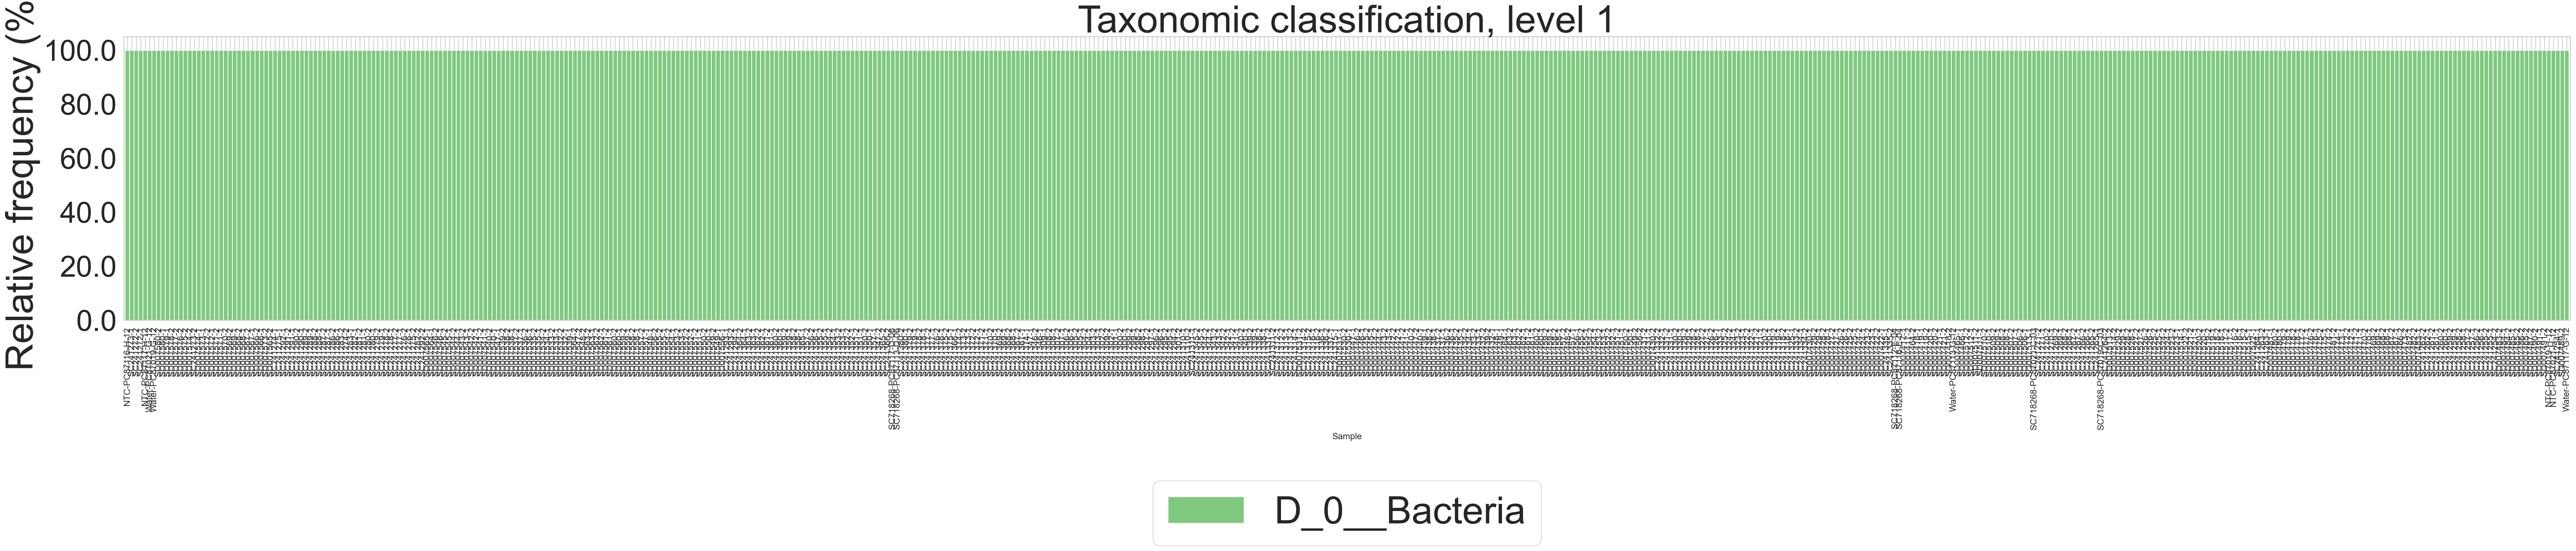

In [16]:
for i in split_df(df_l1b_rel):
    plt.figure(dpi=200)
    plt.rcParams["xtick.labelsize"] = 12
    pal = sns.color_palette("Accent")
    ax = i.sort_values('D_0__Bacteria').plot.bar(stacked=True, color=pal, figsize=(60,7), width=1, edgecolor='white', ax=plt.gca())
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),ncol=4,fontsize=52)
    ax.set_ylabel('Relative frequency (%)',fontsize=52)
    ax.set_xlabel('Sample',fontsize=12)
    ax.set_title('Taxonomic classification, level 1',fontsize=52)
    ax.set_yticklabels(ax.get_yticks(), size=40)
    plt.show()

/var/folders/n2/8cj9dycj38zb4hvvn3mb3k4mm91k55/T/ipykernel_74772/258387812.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=40)


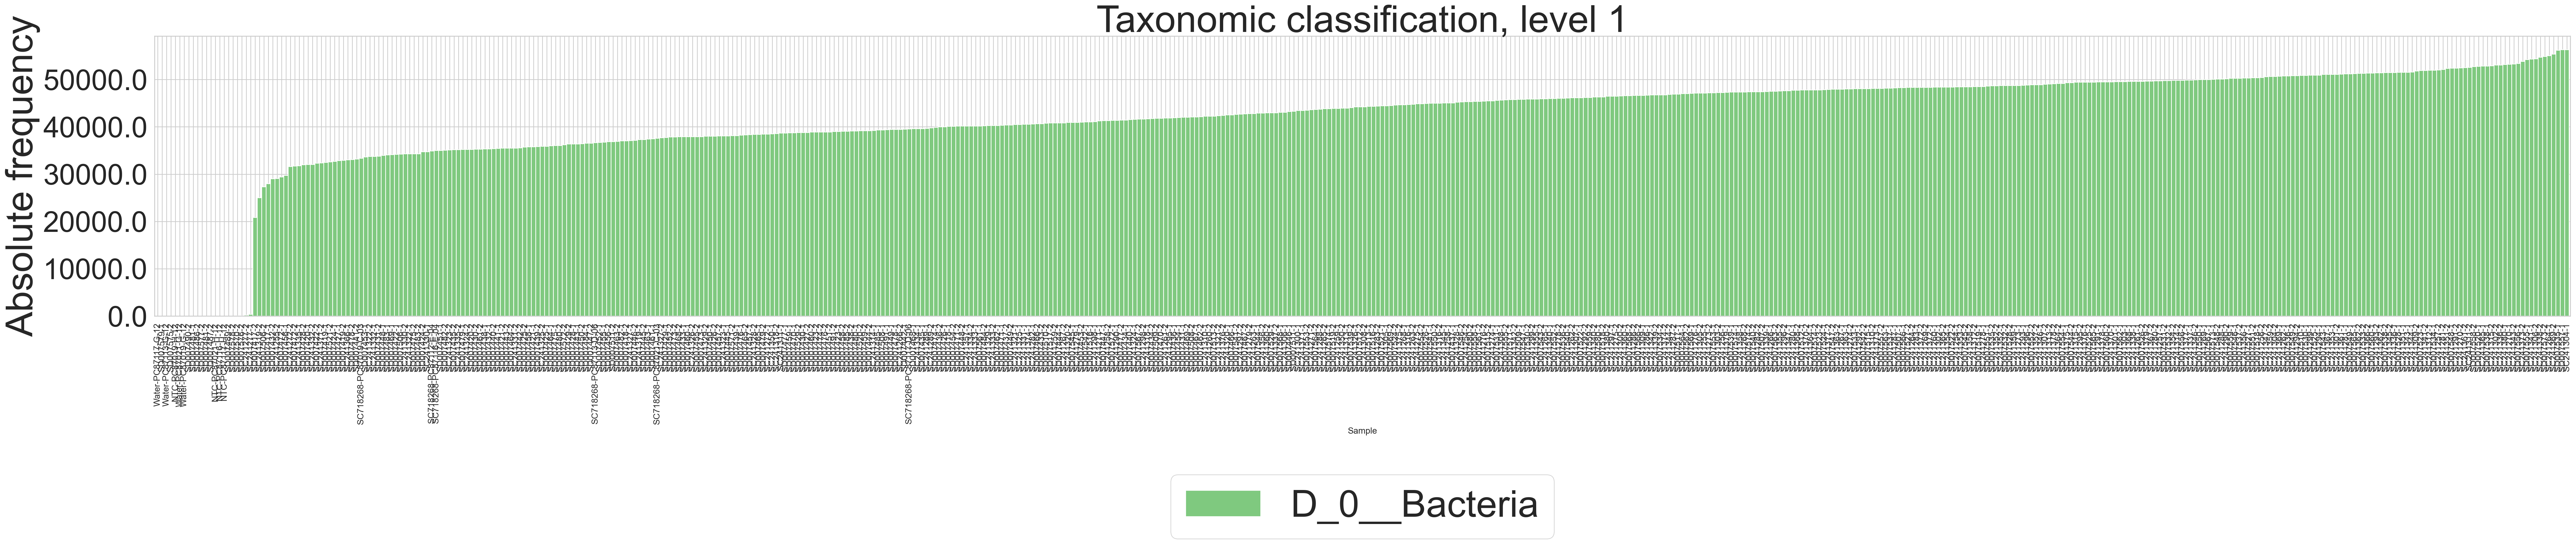

In [17]:
import matplotlib.ticker as ticker

for i in split_df(df_l1b):
    plt.figure(dpi=200)
    pal = sns.color_palette("Accent")
    plt.rcParams["xtick.labelsize"] = 12
    ax = i.sort_values('D_0__Bacteria').plot.bar(stacked=True, color=pal, figsize=(60,7), width=1, edgecolor='white', ax=plt.gca())
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),ncol=4,fontsize=52)
    ax.set_ylabel('Absolute frequency',fontsize=52)
    ax.set_xlabel('Sample',fontsize=12)
    ax.set_title('Taxonomic classification, level 1',fontsize=52)
    ax.set_yticklabels(ax.get_yticks(), size=40)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center", size=12)
    plt.show()

<h3 id="3.3&nbsp;&nbsp;Sequencing-depth-distribution-per-flow-cell">3.3&nbsp;&nbsp;Sequencing depth distribution per flow cell</h3>

Per-sample read depths are recorded in `import_and_demultiplex/<runID>.qzv`.  Those values are plotted below, excluding NTC and water blanks.  Distributions per flow cell should be similar if the flow cells contained the same number of non-blank samples.  If a flow cell contains fewer samples, each sample will have a greater number of reads, so that the total number of reads produced per flow cell remains approximately the same.

In [17]:
%%bash
cd import_and_demultiplex
for i in *qzv; do unzip -q $i -d "rpt_${i%.*}"; done
for i in */*/data/per-sample-fastq-counts.csv; do j=${i%%/*}; k=${j#"rpt_"}; awk -v var="$k" 'BEGIN{FS=",";OFS="\t"}$1!~/Sample name/{print $1,$2,var}' $i >> t; done
echo -e "Sample_name\tSequence_count\tRun_ID" > header
cat header t > rpt_vertical_per-sample-fastq-counts.csv
rm t
cd ..

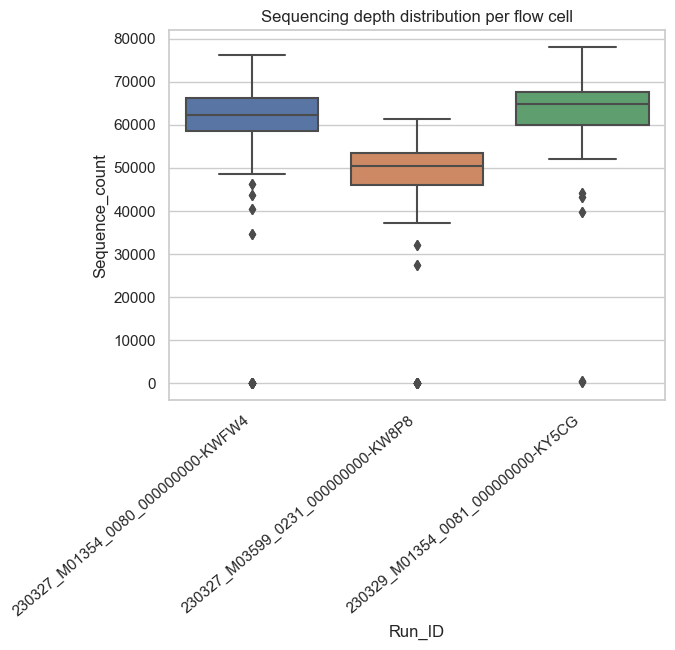

In [18]:
df_depth = pd.read_csv('import_and_demultiplex/rpt_vertical_per-sample-fastq-counts.csv',sep='\t')
search_values = ['Water','NTC']
df_depth_no_blanks = df_depth[~df_depth.Sample_name.str.contains('|'.join(search_values ),case=False)]
plt.figure(dpi=100)
sns.set(style="whitegrid")
ax = sns.boxplot(x="Run_ID",y="Sequence_count",data=df_depth_no_blanks)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")#,fontsize=8)
ax.axes.set_title("Sequencing depth distribution per flow cell",fontsize=12)
# ax.tick_params(labelsize=8)
plt.show()

<h3 id="3.4&nbsp;&nbsp;Read-counts-after-filtering-in-blanks-vs.-study-samples">3.4&nbsp;&nbsp;Read counts after filtering in blanks vs. study samples</h3>

Per-sample read depths at each filtering step are recorded in `denoising/stats/<runID>.qzv`.  The plots below show the mean for each category; error bars indicate the 95% confidence interval.  

NTC blanks are expected to have near-zero read depths, and represent false positives introduced by sequencing reagents.  

Water blanks are expected to have read depths that are at least one to two orders of magnitude lower than the average study sample depth.  They represent the relatively low level of taxa that may be detected in the water used in the lab.

In [19]:
%%bash
cd denoising/stats/
for i in *qzv; do unzip -q $i -d "rpt_${i%.*}"; done
for i in rpt_*/*/data/metadata.tsv; do dos2unix -q $i; j=${i%%/*}; k=${j#"rpt_"}; awk -v var="$k" 'BEGIN{FS=OFS="\t"}NR>2{print $0,var}' $i >> t; done
cat <(echo -e "sample-id\tinput\tfiltered\tdenoised\tmerged\tnon-chimeric\tflow_cell") t > rpt_denoising_stats.tsv
rm t
cd ../..

In [20]:
df_stats = pd.read_csv('denoising/stats/rpt_denoising_stats.tsv',sep='\t')
df_stats = df_stats.set_index('sample-id')

In [21]:
def plot_read_counts(samples,pop):
    plt.figure(dpi=100)
    sns.set(style="whitegrid")
    ax = sns.barplot(data=df_stats[df_stats.index.isin(samples)]).set_title('Number of reads in ' + pop + ' samples')
    plt.show()

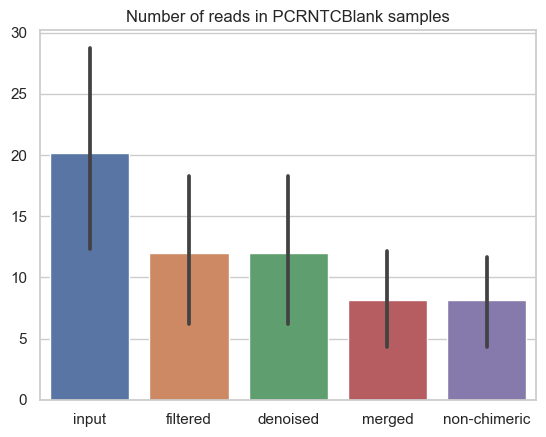

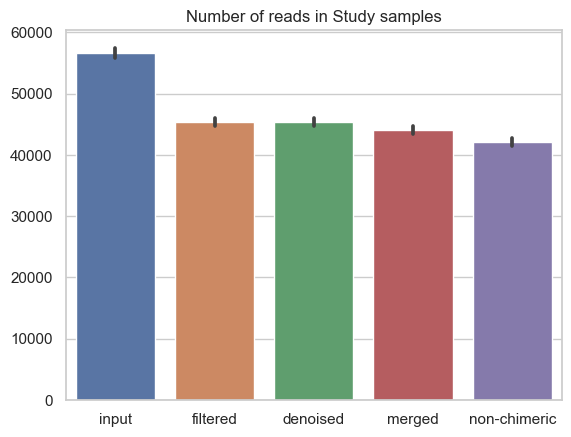

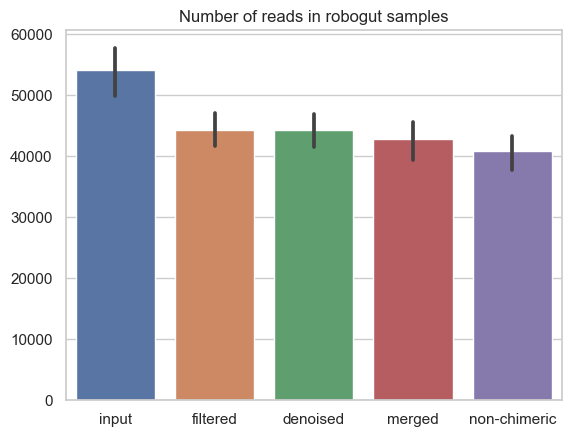

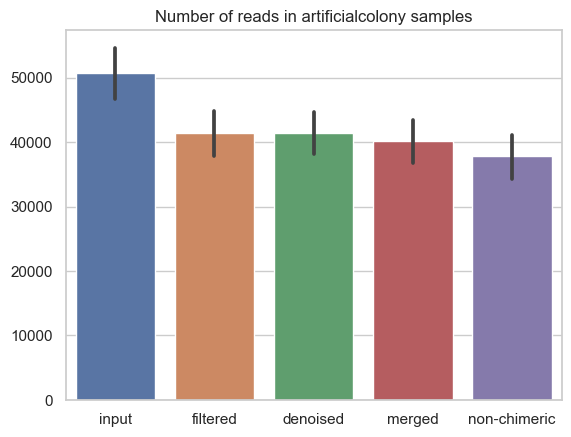

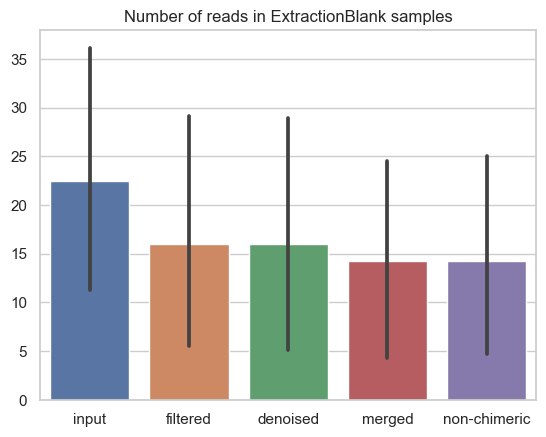

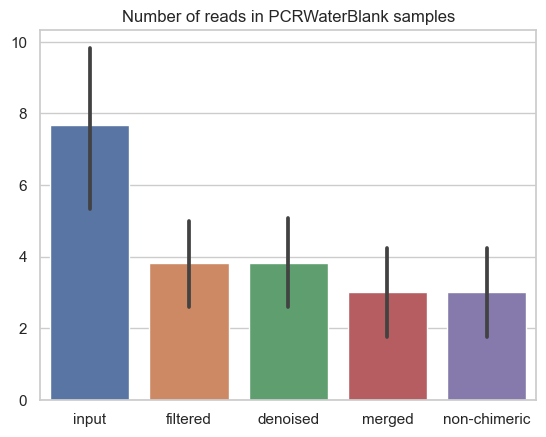

In [22]:
if 'sampletype' in manifest.columns:
    for i in manifest['sampletype'].unique():
        l = list(manifest[manifest['sampletype'].str.match(i)].index)
        plot_read_counts(l,i)
else:
    print("No Sample Type column detected in manifest.")

The table below shows the 30 samples with the lowest non-chimeric read counts.  This information may be helpful in identifying problematic samples and determining a minimum read threshold for sample inclusion.  Note that low-depth study samples will be excluded from diversity analysis based on the sampling depth threshold selected (discussed in the following section).

In [23]:
if 'externalid' in manifest.columns:
    display(df_stats.join(manifest[['externalid']])[['externalid','input','filtered','denoised','merged','non-chimeric']].sort_values(['non-chimeric']).head(30))
else:
    display(df_stats[['input','filtered','denoised','merged','non-chimeric']].sort_values(['non-chimeric']).head(30))

externalid  input  filtered  denoised  merged  \
SD007576-1          LPB9147_2000     17         8         8       0   
SD007489-1            FD32490731      8         6         6       0   
SD007490-1            FD32445419      8         8         8       0   
SD007490-1            FD32445419      8         8         8       0   
SD007570-1                    EB      8         1         1       0   
SD007570-1                    EB      8         1         1       0   
SD007575-1          UTE1207_2000     13         6         6       0   
SD007575-1          UTE1207_2000     13         6         6       0   
SD007488-2            FD32490923     14         7         7       0   
SD007488-1            FD32490923     44         9         9       0   
SD007486-1            FD32445323     25         7         7       0   
SD007576-1          LPB9147_2000     17         8         8       0   
SD007578-1          DMC5475_2000      9         3         3       0   
SD007578-1          DMC5475_2000      9         3         3       0   
SD007488-1            FD32490923     44         9         9       0   
SD007487-1            FD32490827      5         2         2       0   
SD007579-2          ZNG4235_2000     19        13        13       0   
SD007579-2          ZNG4235_2000     19        13        13       0   
Water-PC87112-G-12         Water     11         4         4       0   
Water-PC87112-G-12         Water     11         4         4       0   
SD007487-1            FD32490827      5         2         2       0   
NTC-PC87113-H-12             NTC      7         1         1       0   
NTC-PC87113-H-12             NTC      7         1         1       0   
NTC-PC87112-H-12             NTC      5         0         0       0   
NTC-PC87112-H-12             NTC      5         0         0       0   
SD007486-1            FD32445323     25         7         7       0   
Water-PC87116-G-12         Water      1         0         0       0   
Water-PC87116-G-12         Water      1         0         0       0   
SD007489-1            FD32490731      8         6         6       0   
SD007488-2            FD32490923     14         7         7       0   

                    non-chimeric  
SD007576-1                     0  
SD007489-1                     0  
SD007490-1                     0  
SD007490-1                     0  
SD007570-1                     0  
SD007570-1                     0  
SD007575-1                     0  
SD007575-1                     0  
SD007488-2                     0  
SD007488-1                     0  
SD007486-1                     0  
SD007576-1                     0  
SD007578-1                     0  
SD007578-1                     0  
SD007488-1                     0  
SD007487-1                     0  
SD007579-2                     0  
SD007579-2                     0  
Water-PC87112-G-12             0  
Water-PC87112-G-12             0  
SD007487-1                     0  
NTC-PC87113-H-12               0  
NTC-PC87113-H-12               0  
NTC-PC87112-H-12               0  
NTC-PC87112-H-12               0  
SD007486-1                     0  
Water-PC87116-G-12             0  
Water-PC87116-G-12             0  
SD007489-1                     0  
SD007488-2                     0

### 3.6 QC samples

If robogut and/or artificial colony samples are included in the analysis, then the distributions of relative abundances in each sample at classification levels 2 through 6 are shown here.  This illustrates the variability between samples within each QC population with regard to taxonomic classification.  Note that this section uses the taxonomic classification prior to removal of non-bacterial reads.

In [24]:
ac_samples = []
water_samples = []

if 'sampletype' in manifest.columns:
    ac_samples = list(manifest[manifest['sampletype'].str.lower().isin(['artificialcolony','artificial colony'])].index)
    water_samples = list(manifest[manifest['sampletype'].str.lower().isin(['pcrntcblank','pcrwaterblank'])].index)
    
else:
    print("No Sample Type column detected in manifest.")

In [25]:
def plot_rel_abundances_in_QCs(samples,qc_pop):
    levels = [2,3,4,5,6]
    for n in levels:
        f = glob.glob('taxonomic_classification/*/*/level-' + str(n) + '.csv')
        df = pd.read_csv(f[0],index_col=0)
        df = df[df.index.isin(samples)]
        df = df.select_dtypes(['number']).dropna(axis=1, how='all').loc[:,~(df==0.0).all(axis=0)]
        df_rel = df.div(df.sum(axis=1), axis=0) * 100
        plt.figure(dpi=150) 
        ax = df_rel.boxplot()
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=8)
        ax.set_title('Distribution of relative abundances in ' + qc_pop + ', level ' + str(n))
        plt.show()

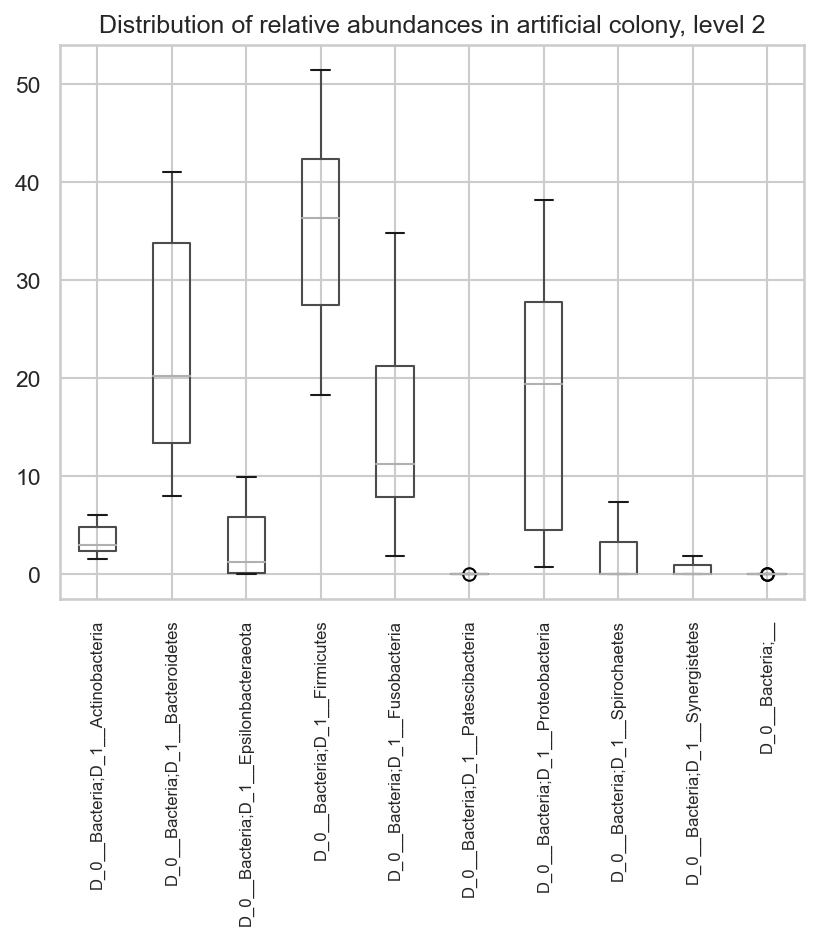

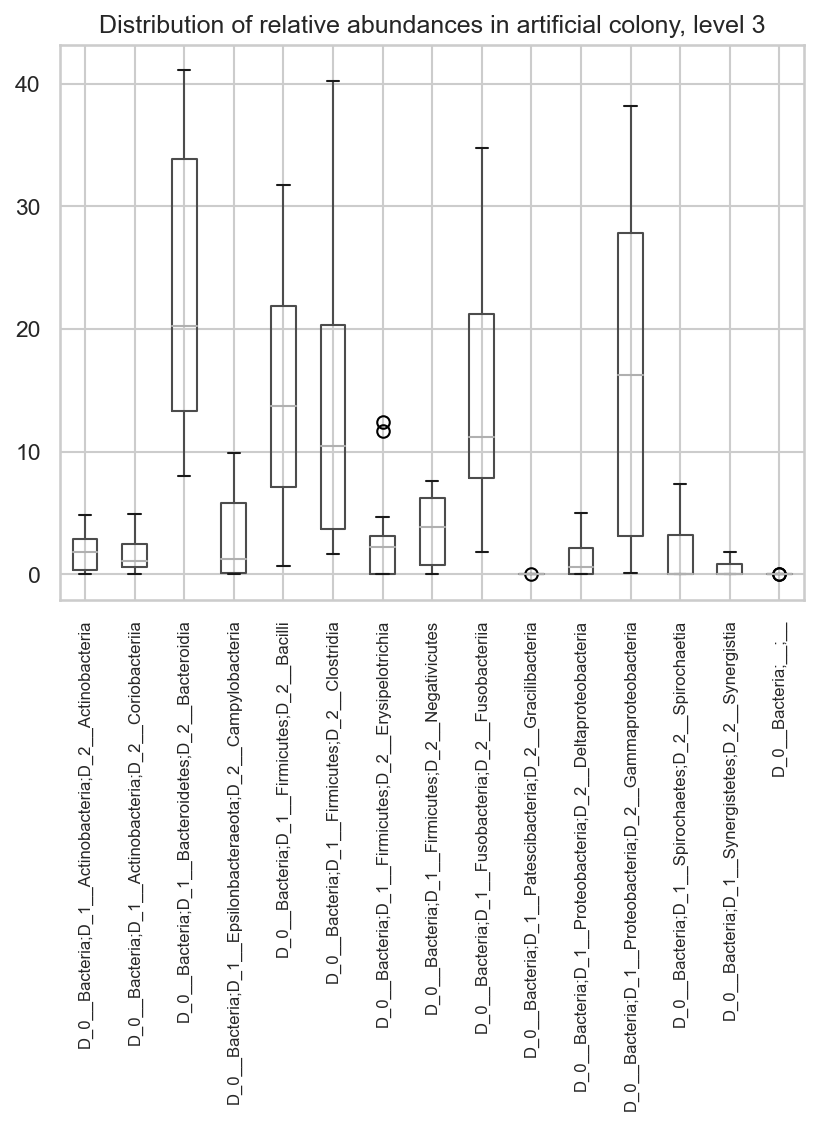

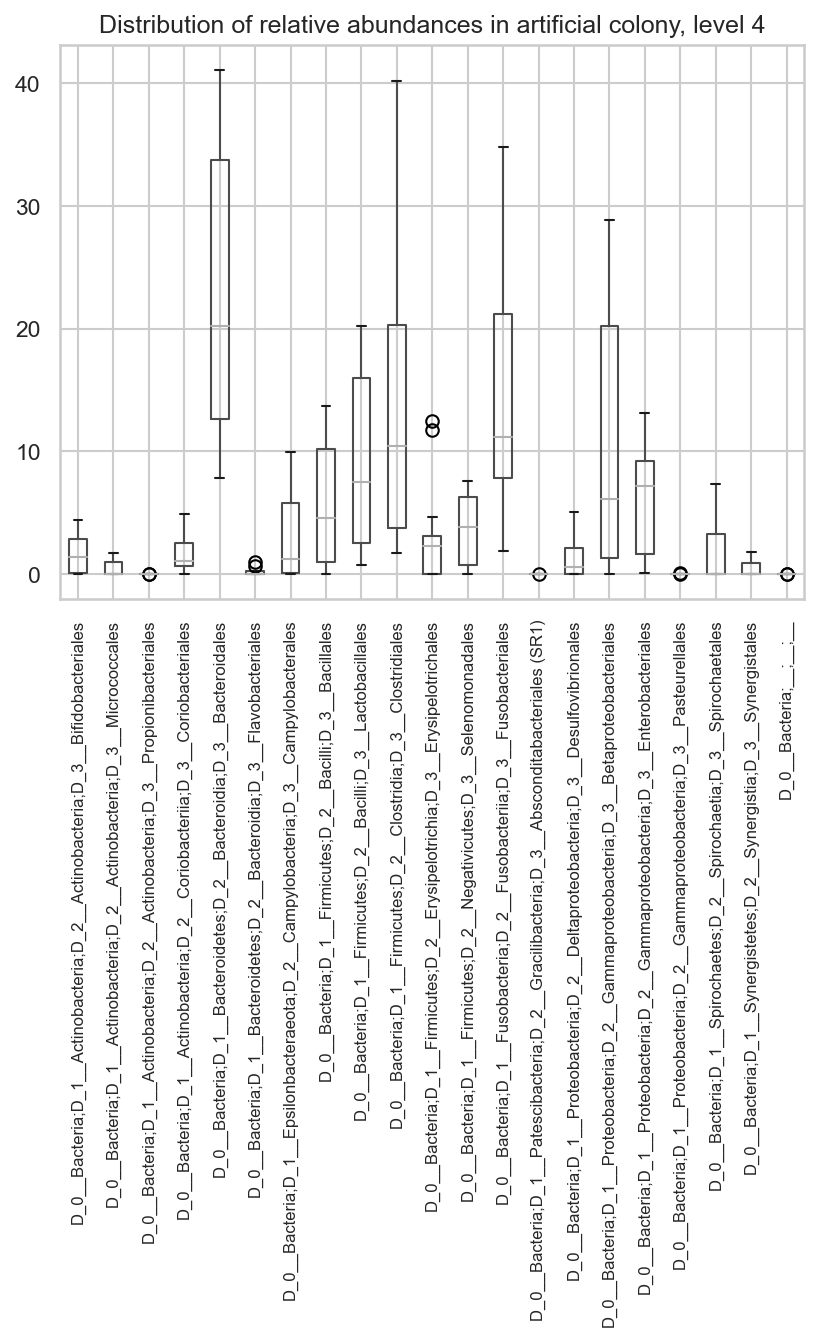

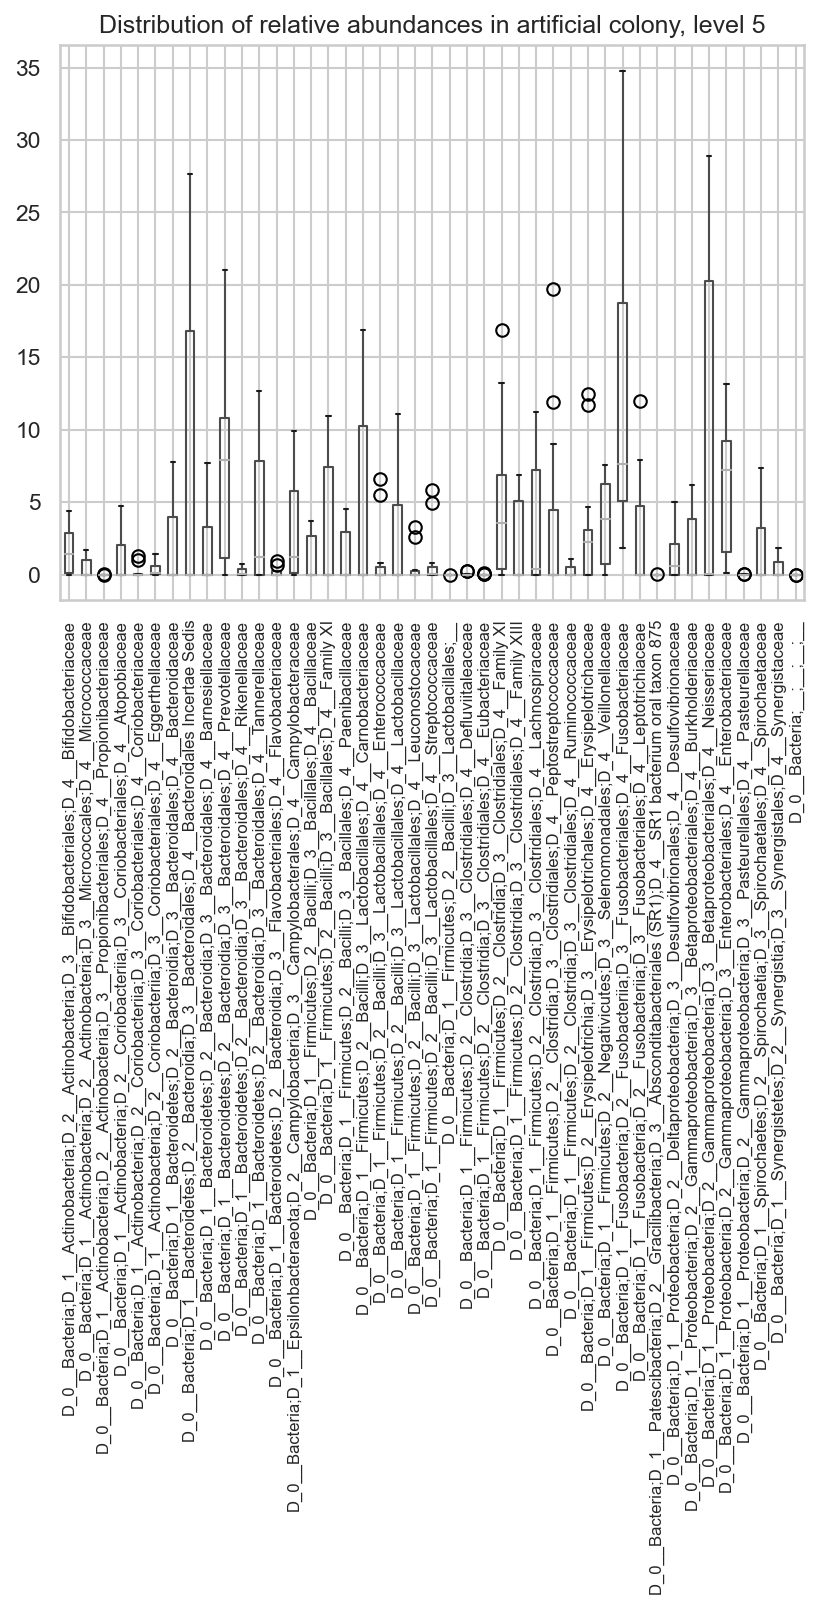

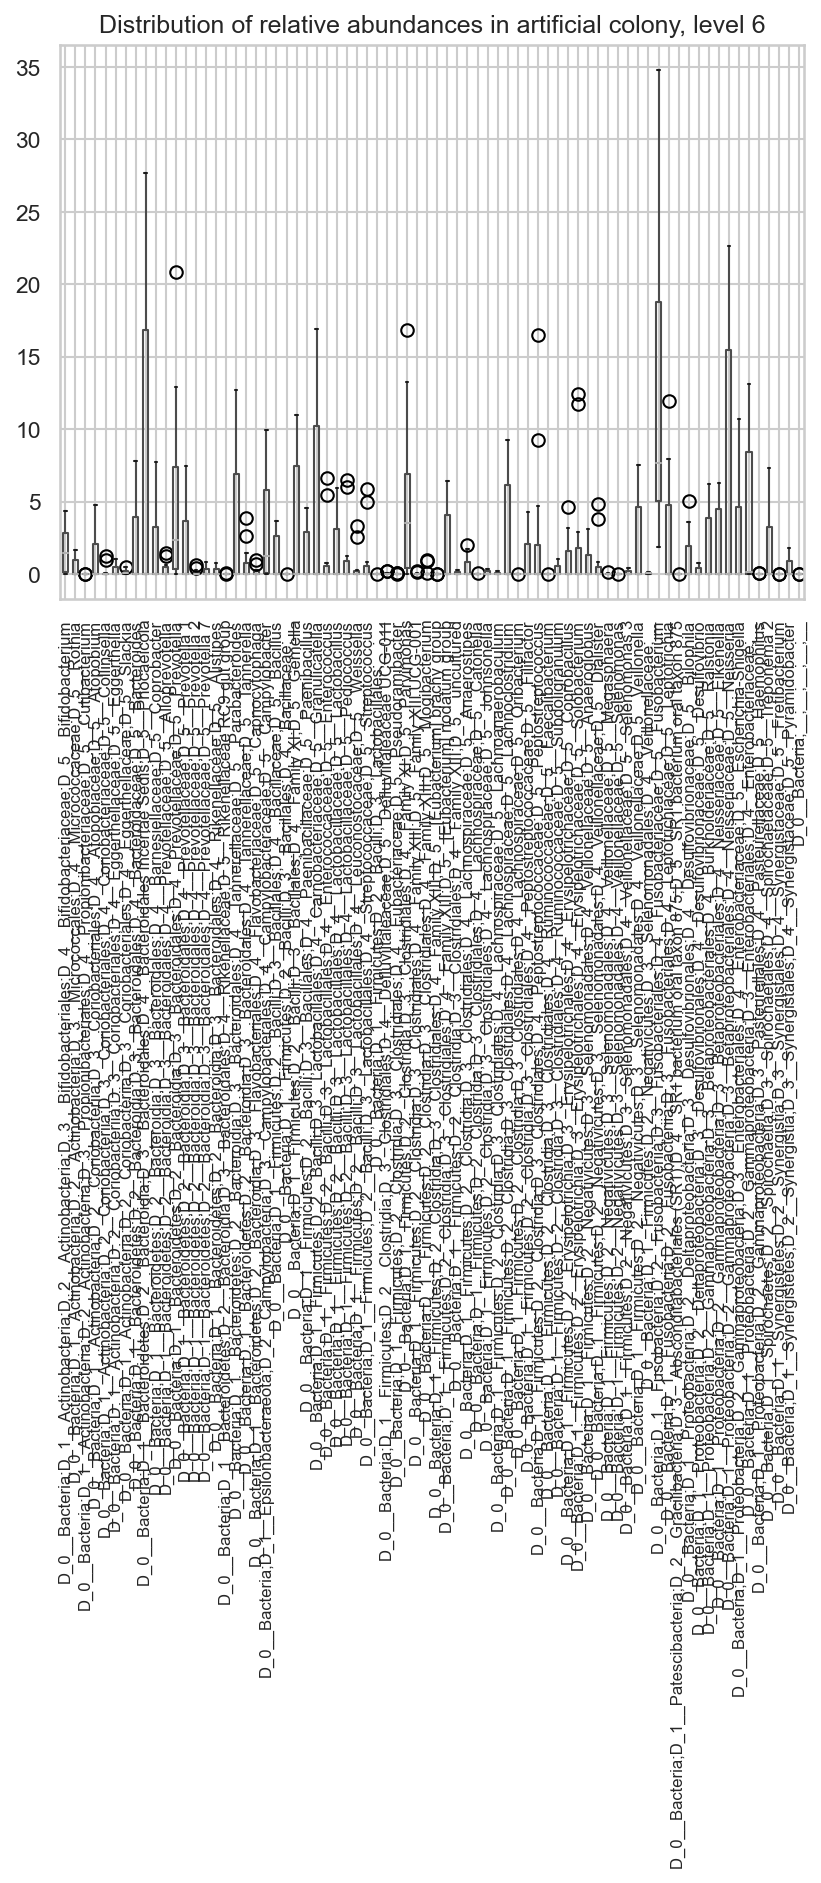

In [26]:
if ac_samples:
    plot_rel_abundances_in_QCs(ac_samples,'artificial colony')
else:
    print("No artificial colony samples were included in this pipeline run.")

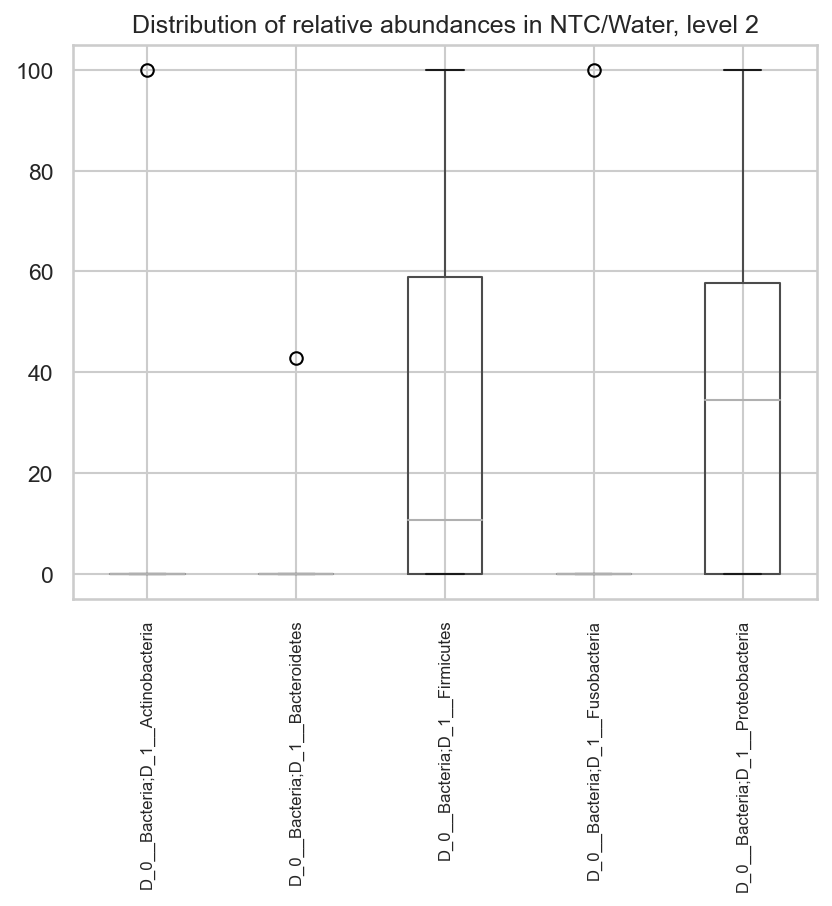

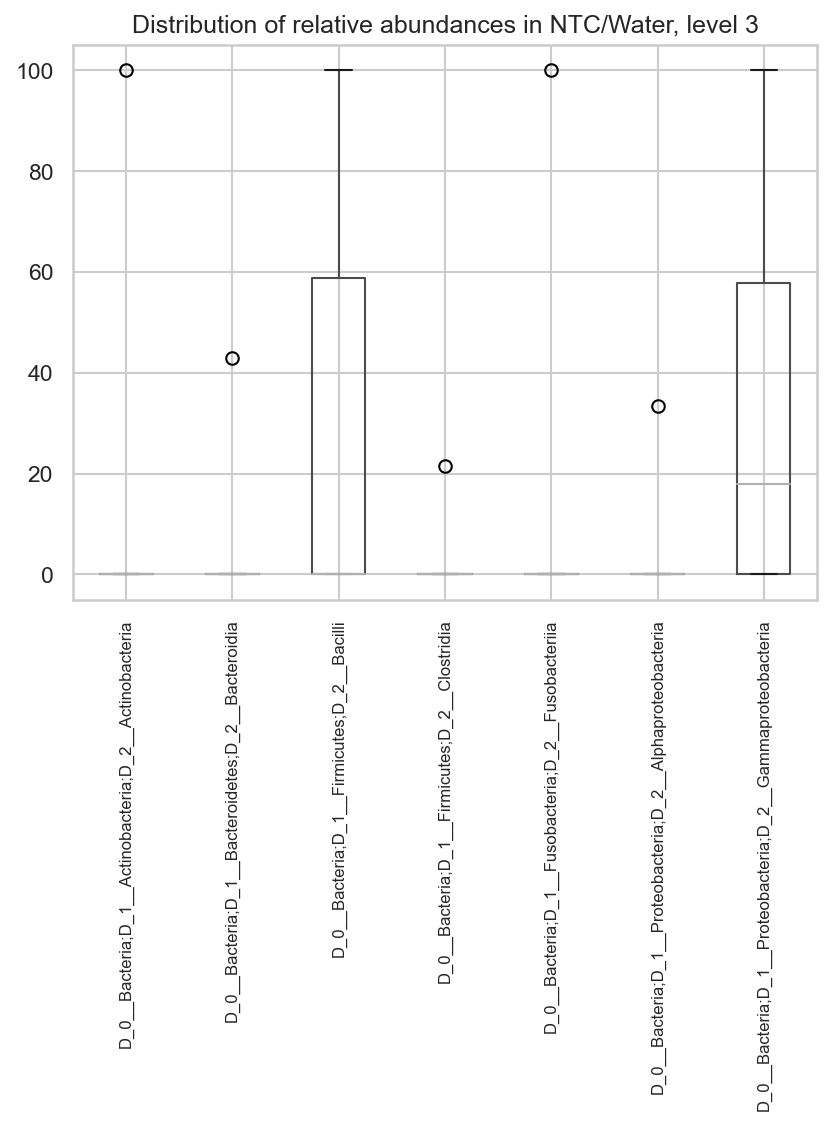

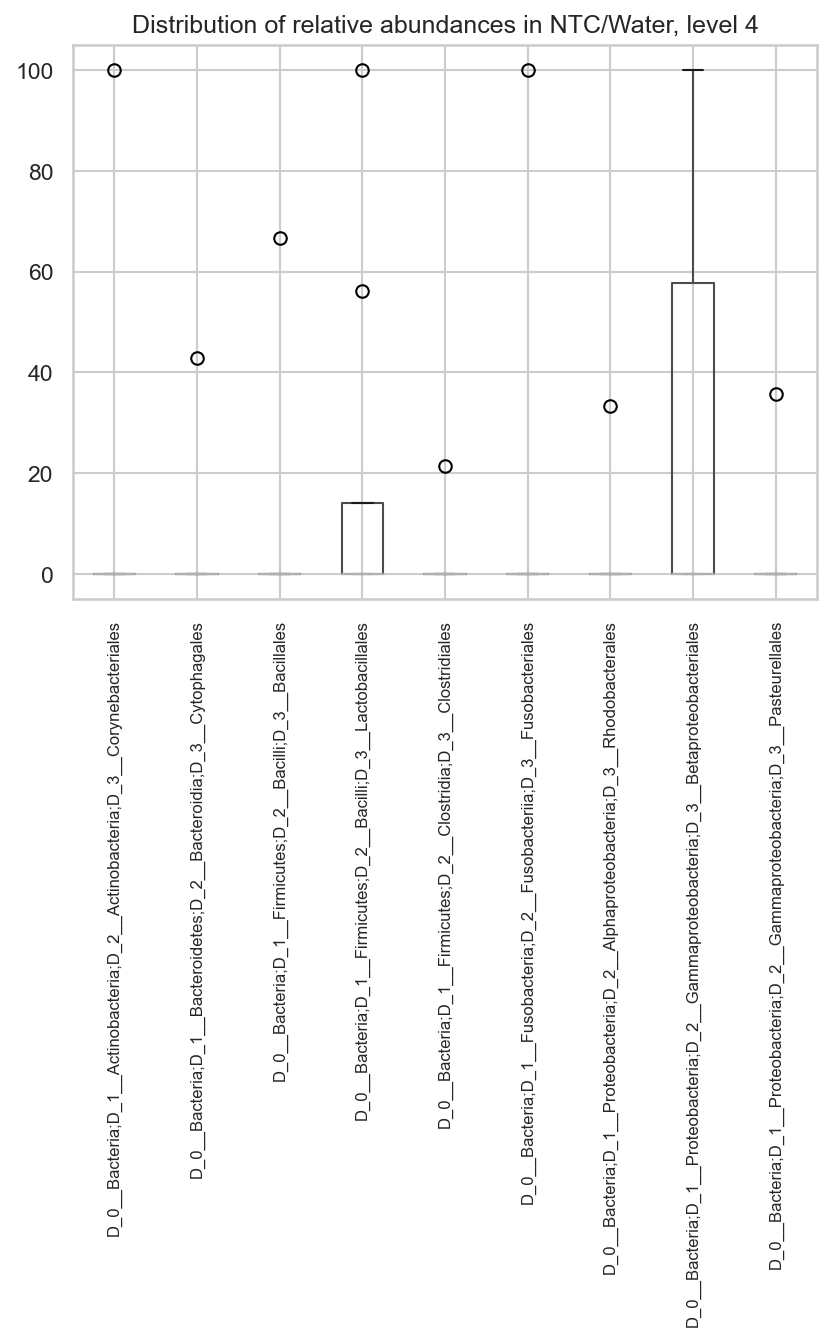

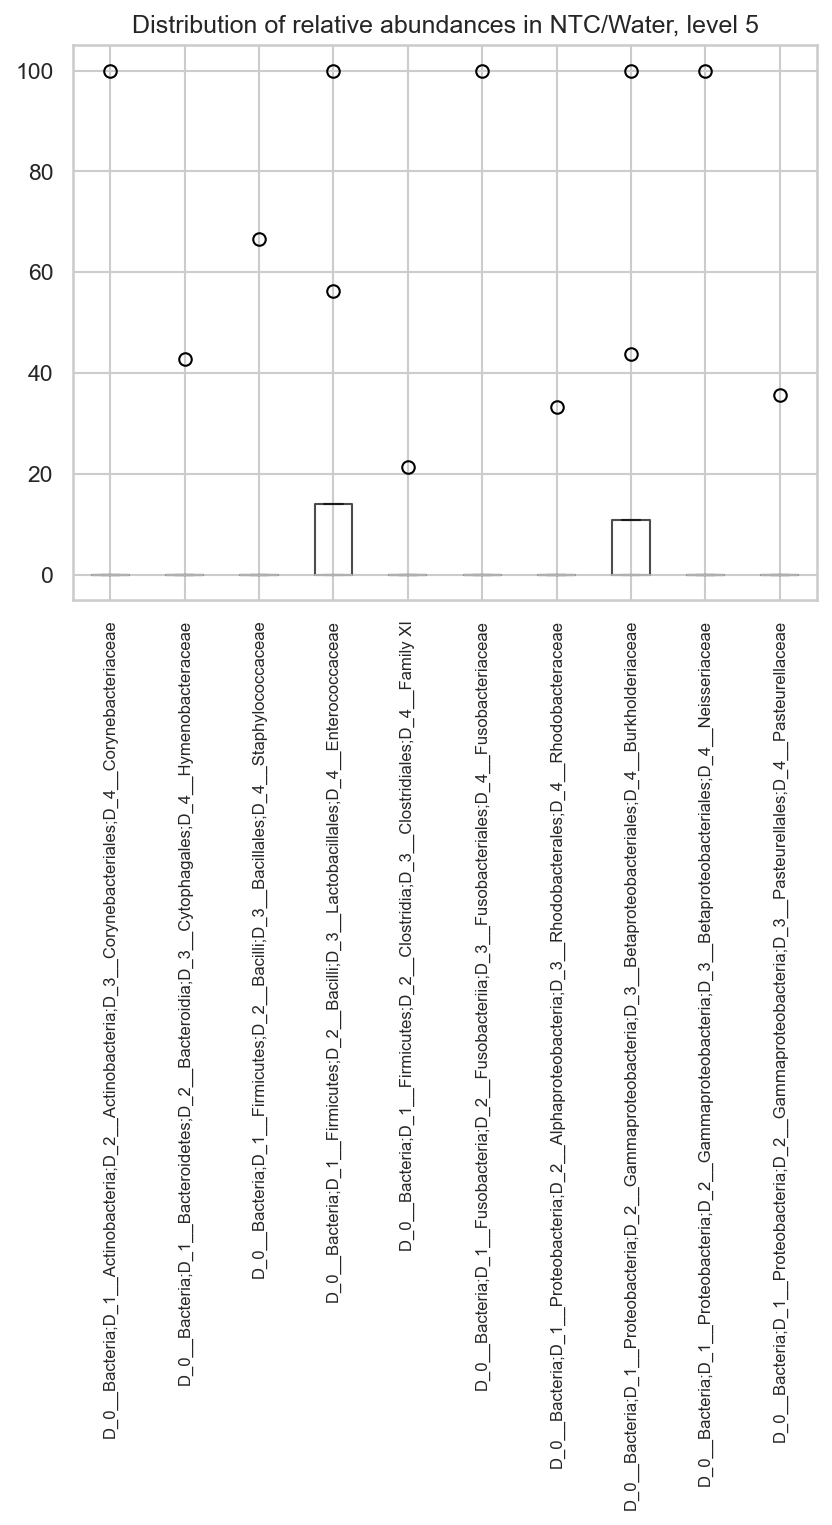

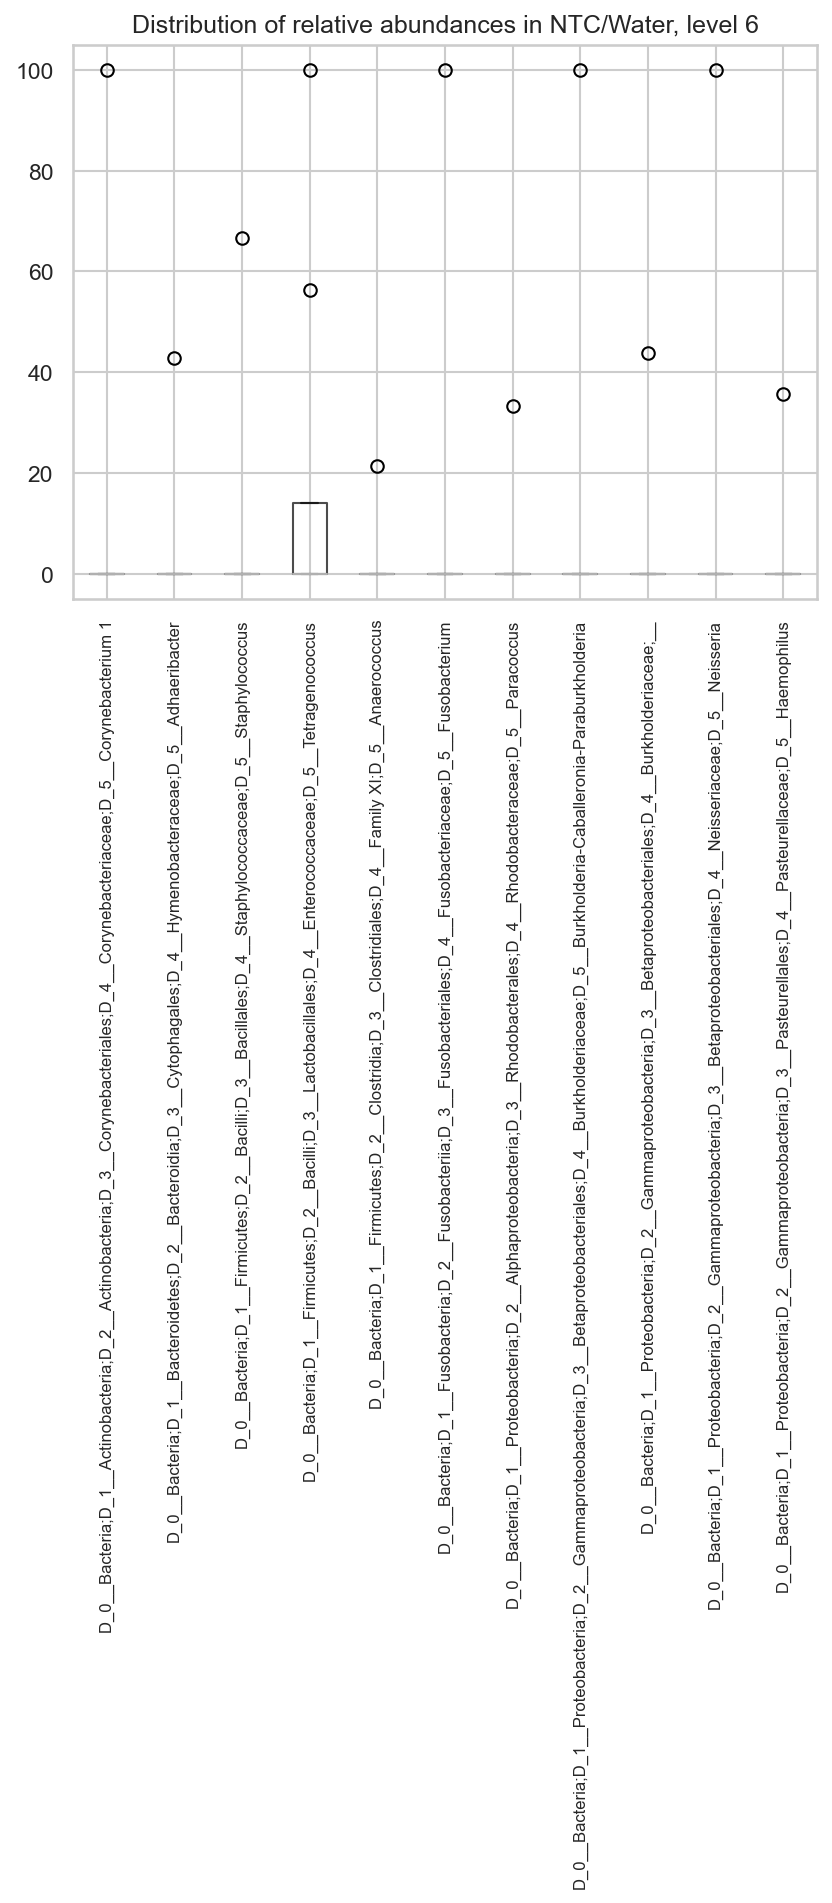

In [27]:
if water_samples:
    plot_rel_abundances_in_QCs(water_samples,'NTC/Water')
else:
    print("No robogut samples were included in this pipeline run.")

<h2 id="4&nbsp;&nbsp;Rarefaction-threshold">4&nbsp;&nbsp;Rarefaction threshold</h2>

QIIME randomly subsamples the reads per sample, without replacement, up to the sampling depth parameter.  Samples with reads below the sampling depth are excluded from analysis.  A higher sampling depth will include more reads overall, but will also exclude more samples.

Our default sampling depth is 10,000, which is the setting for the initial pipeline run (`<datestamp>_initial_run`).  The information provided in this section may be used to fine tune the sampling depth for subsequent runs.

In [12]:
!unzip -q -d bacteria_only/feature_tables/rpt_merged_{ref_db}_qzv bacteria_only/feature_tables/{ref_db}/merged.qzv

In [13]:
df_features_per_samples = pd.read_csv(glob.glob('bacteria_only/feature_tables/rpt_merged_' + ref_db + '_qzv/*/data/sample-frequency-detail.csv')[0],sep=",",header=None,index_col=0)
if 'externalid' in manifest.columns:
    df_features_per_samples = df_features_per_samples.join(manifest[['externalid']]).set_index('externalid')
sample_ttl = len(df_features_per_samples.index)
feature_ttl = df_features_per_samples[1].sum()
blank_ttl = len(df_features_per_samples[df_features_per_samples.index.str.contains('Water|NTC',case=False)])
values = [10000,20000,30000,40000,50000,60000,80000,100000]
samples = []
features = []
blanks = []
ids = []
for n in values:
    df_temp = df_features_per_samples[df_features_per_samples[1] > n]
    l = df_features_per_samples[df_features_per_samples[1] <= n].index.to_list()
    l.sort()
    ids.append(l)
    samples_left = len(df_temp.index)
    blanks_left = len(df_temp[df_temp.index.str.contains('Water|NTC',case=False)])
    samples.append(samples_left/sample_ttl * 100)
    features.append((samples_left * n)/feature_ttl * 100)
    if blank_ttl != 0:
        blanks.append(blanks_left/blank_ttl * 100)
    else:
        blanks.append("NA")
df_rarify = pd.DataFrame(list(zip(values, samples, features, ids, blanks)),columns=['Sampling_depth','Percent_retained_samples','Percent_retained_seqs','Samples_excluded','Percent_retained_blanks'])
df_rarify = df_rarify.set_index('Sampling_depth')
pd.set_option('display.max_colwidth', 0)
df_rarify[['Samples_excluded','Percent_retained_samples','Percent_retained_blanks']]

Samples_excluded  \
Sampling_depth                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
10000           [DMC5475_2000, EB, EB, EB, FD32445323, FD32445419, FD32490731, FD32490827, LPB9147_2000, NTC, NTC, NTC, NTC, QZS0513_2000, TV_2024_0103, TV_2024_0103, UTE1207_2000, Water, Water, Water, Water, ZNG4235_2000]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
20000           [DMC5475_2000, EB, EB, EB, FD32445323, FD32445419, FD32490731, FD32490827, LPB9147_2000, NTC, NTC, NTC, NTC, QZS0513_2000, TV_2024_0103, TV_2024_0103, UTE1207_2000, Water, Water, Water, Water, ZNG4235_2000]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
30000           [DMC5475_2000, EB, EB, EB, FD32445323, FD32445419, FD32490731, FD32490827, G802267777, G802267777, LPB9

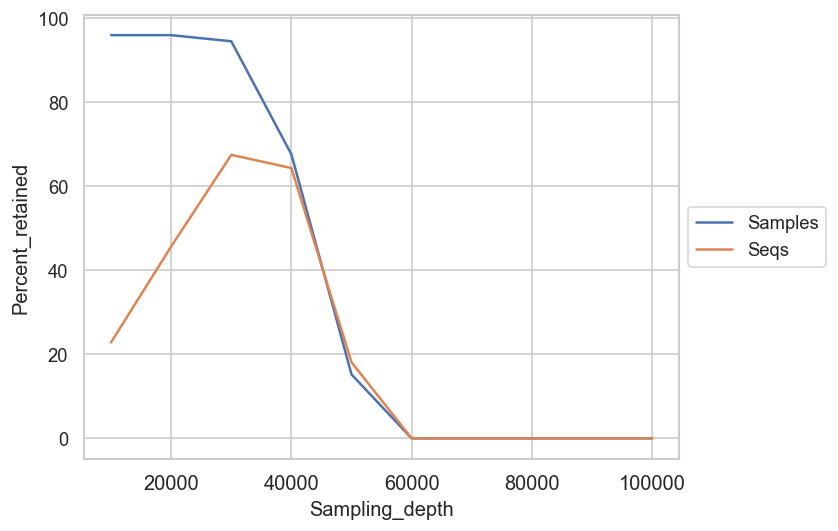

In [14]:
df_rarify_tidy = df_rarify.reset_index().drop(columns=['Samples_excluded','Percent_retained_blanks']).melt(id_vars='Sampling_depth')
df_rarify_tidy.columns = ['Sampling_depth','Var','Percent_retained']
df_rarify_tidy['Var'] = df_rarify_tidy['Var'].str.replace('Percent_retained_s','S')
plt.figure(dpi=120)
plt.rcParams["xtick.labelsize"] = 12
ax = sns.lineplot(x="Sampling_depth", y="Percent_retained", hue="Var",data=df_rarify_tidy)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

For this pipeline run, the rarefaction depth was set in the config file as follows:

In [55]:
!grep "sampling_depth" ../*.y[a]*ml

sampling_depth: 10000


<h2 id="5&nbsp;&nbsp;Alpha-diversity">5&nbsp;&nbsp;Alpha diversity</h2>

Alpha diversity measures species richness, or variance within a sample.  

The rarefaction curves below show the number of species as a function of the number of samples.  The various plots are stratified by the metadata available in the manifest.  The curves are expected to grow rapidly as common species are identified, then plateau as only the rarest species remain to be sampled.  The rarefaction threshold discussed above should fall within the plateau of the rarefaction curves.

This report provides the following alpha diversity metrics:
- __Observed OTUs:__ represents the number of observed species for each class
- __Shannon diversity index:__ Calculates richness and diversity using a natural logarithm; accounts for both abundance and evenness of the taxa present; more sensitive to species richness than evenness
- __Faith's phylogenetic diversity:__ Measure of biodiversity that incorporates phylogenetic difference between species via sum of length of branches

Note that both phylogenetic tree construction and alpha diversity analysis are performed after non-bacterial read exclusion.

In [26]:
!unzip -q -d diversity_core_metrics/{ref_db}/rpt_rarefaction diversity_core_metrics/{ref_db}/rarefaction.qzv

In [8]:
def format_alpha_data(metric, csv):
    df = pd.read_csv(csv,index_col=0)
    df.columns = map(str.lower, df.columns)
    depth_cols = [col for col in df.columns if 'depth-' in col]
    non_depth_cols = [col for col in df.columns if 'depth-' not in col]
    depths = list(set([i.split('_', 1)[0] for i in depth_cols]))
    iters = list(set([i.split('_', 1)[1] for i in depth_cols]))
    df_melt1 = pd.DataFrame()
    df_melt2 = pd.DataFrame()
    for d in depths:
        df_temp = df.filter(regex=d+'_')
        df_temp.columns = iters
        df_temp = pd.concat([df_temp,df[non_depth_cols]],axis=1)
        df_temp['depth'] = int(d.split('-')[1])
        df_melt1 = pd.concat([df_melt1,df_temp],axis=0)
    non_depth_cols.append('depth')
    for i in iters:
        df_temp = df_melt1.filter(regex='^' + i + '$')
        df_temp.columns = [metric]
        df_temp = pd.concat([df_temp,df_melt1[non_depth_cols]],axis=1)
        df_temp['iteration'] = int(i.split('-')[1])
        df_melt2 = pd.concat([df_melt2,df_temp],axis=0)
    return df_melt2

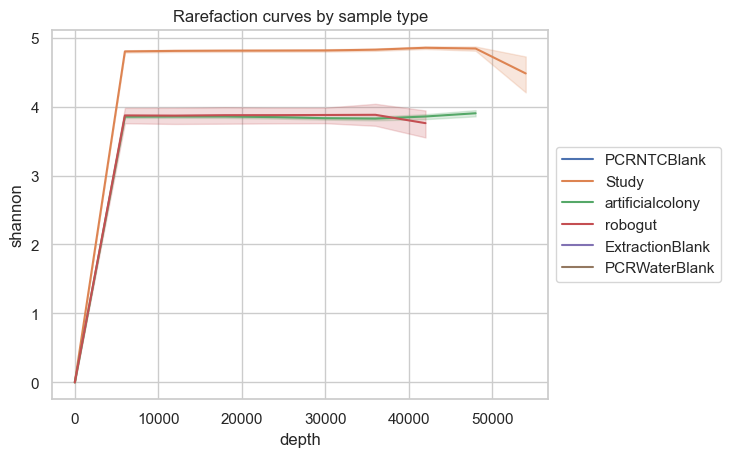

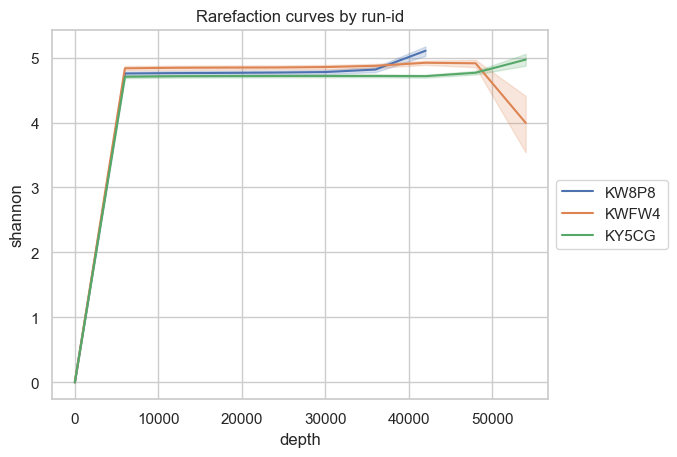

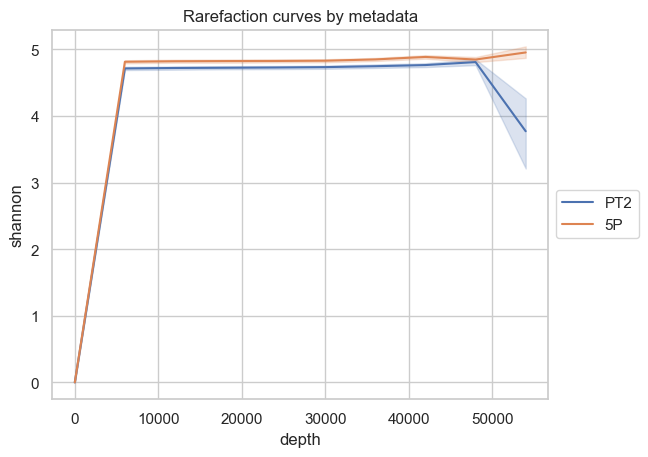

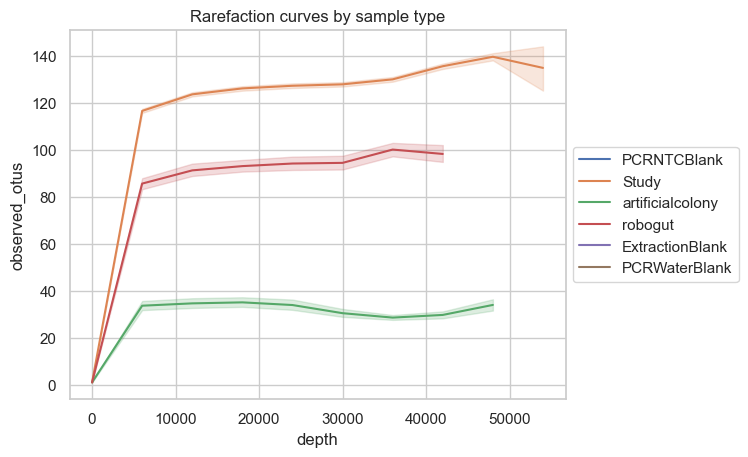

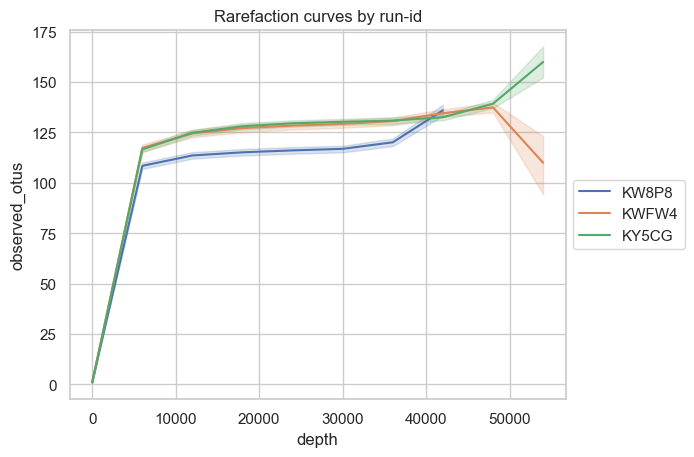

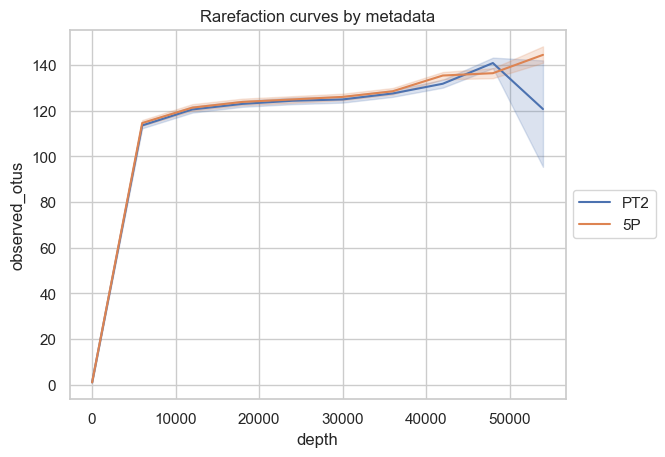

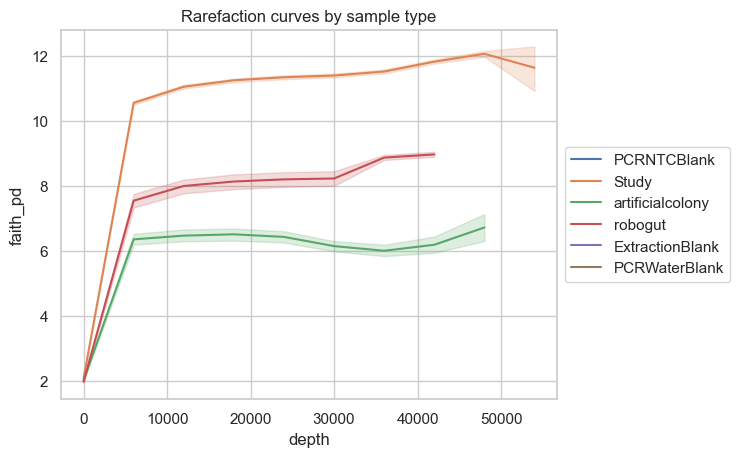

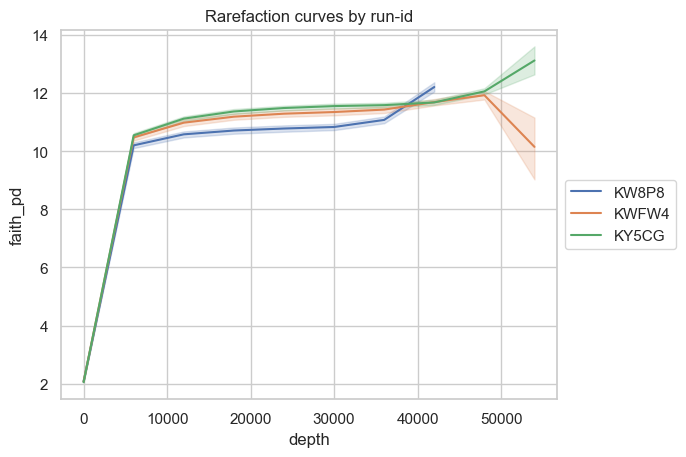

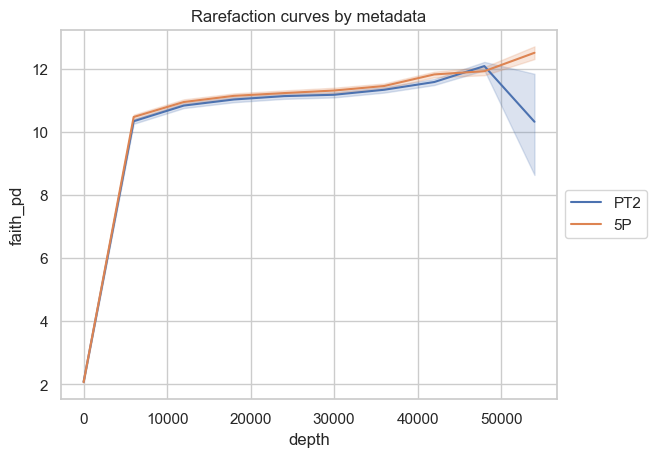

In [11]:
files = glob.glob('diversity_core_metrics/' + ref_db + '/rpt_rarefaction/*/data/*.csv')
for f in files:
    b = os.path.basename(f).split('.')[0]
    df = format_alpha_data(b, f)
    if len(manifest['run-id'].astype(str).str.split('_',n=2,expand=True).columns) > 1:
        #df['Sequencer'] = (df['run-id'].astype(str).str.split('_',n=2,expand=True))[1]
        df['run-id'] = (df['run-id'].astype(str).str.split('-',expand=True)[1])
    if 'sourcepcrplate' in df.columns:
        df['PCR_plate'] = (df['sourcepcrplate'].str.split('_',n=1,expand=True))[0]
    cols = df.columns.drop([b,'depth','iteration','source pcr plate','external id','extractionbatchid','project-id','fq1','fq2','viallabel','subject',],errors='ignore')
    #print(cols)
    # Reset the index to create a new integer index
    df.reset_index(inplace=True)
    
    for c in cols:
        plt.figure(dpi=100)
        ax = sns.lineplot(x="depth", y=b, hue=c, err_style="band", data=df)
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=handles[0:], labels=labels[0:], loc='center left', bbox_to_anchor=(1, 0.5))
        ax.set_title('Rarefaction curves by ' + c)
    plt.show()

<h2 id="6&nbsp;&nbsp;Beta-diversity">6&nbsp;&nbsp;Beta diversity</h2>

The data displayed here is mainly for use in evaluating potential confounders (e.g. flow cell, sequencer, etc.).  For convenience, we have included the PCoA plots for all metadata provided; however, we strongly encourage the use of [EMPeror](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4076506/), available through [QIIME's viewer](https://view.qiime2.org/), for further project analysis.

Beta diversity measures variance across samples/environments.  

The three-axis plots below show PCoA results for the first three components of several beta diversity metrics.  Percent variance explained is displayed on each axis.  This report provides the following beta diversity metrics:
- __Bray-Curtis dissimilarity:__ Fraction of overabundant counts; creates a matrix of the differences in microbial abundances between two samples (0 indicates that the samples share the same species at the same abundances, 1 indicates that both samples have completely different species and abundances)
- __Jaccard similarity index:__ Fraction of unique features, regardless of abundance
- __Unweighted UniFrac:__ Measures the phylogenetic distance between sets of taxa in a phylogenetic tree as the fraction of unique branch length
- __Weighted UniFrac:__ Same as above, but takes into account the relative abundance of each of the taxa

Beta diversity analysis is performed after non-bacterial read exclusion.

In [52]:
!unzip -q -d diversity_core_metrics/{ref_db}/rpt_bray-curtis_dist diversity_core_metrics/{ref_db}/bray-curtis_dist.qza
!unzip -q -d diversity_core_metrics/{ref_db}/rpt_weighted_dist diversity_core_metrics/{ref_db}/weighted_dist.qza
!unzip -q -d diversity_core_metrics/{ref_db}/rpt_unweighted_dist diversity_core_metrics/{ref_db}/unweighted_dist.qza
!unzip -q -d diversity_core_metrics/{ref_db}/rpt_jaccard_dist diversity_core_metrics/{ref_db}/jaccard_dist.qza

In [11]:
if len(manifest['run-id'].astype(str).str.split('_',n=2,expand=True).columns) > 1:
    m['Sequencer'] = (manifest['run-id'].astype(str).str.split('_',n=2,expand=True))[1]
    m['run-id'] = (manifest['run-id'].astype(str).str.split('-',expand=True)[1])
else:
    print("Can not infer sequencer ID from run ID.")
if 'sourcepcrplate' in manifest.columns:
    m['PCR_plate'] = (manifest['sourcepcrplate'].str.split('_',n=1,expand=True))[0]
m.fillna('na', inplace=True)
# should probably save this file, or even better, include in original manifest prior to analysis....

In [12]:
import warnings
warnings.filterwarnings("ignore", message="The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues")
# NOTE: without this filter, pcoa plotting may generate runtime warning messages like the following:
    # /Users/ballewbj/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: 
    # RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some 
    # of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if 
    # they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest 
    # eigenvalue is -0.41588455816214936 and the largest is 9.807175722836307.
    # RuntimeWarning
# This warning is explained in detail here: https://github.com/biocore/scikit-bio/issues/1410

In [20]:
def plot_pcoas(metric):
    mpl.rcParams['figure.dpi'] = 100
    mpl.rcParams['figure.figsize'] = 9, 6
    df = pd.read_csv(glob.glob('diversity_core_metrics/' + ref_db + '/rpt_' + metric + '_dist/*/data/distance-matrix.tsv')[0],sep='\t',index_col=0)
    sample_ids = df.index.values
    dist = df.to_numpy()
    dm = DistanceMatrix(dist, sample_ids)
    pc = pcoa(dm)
    var1 = str(round(pc.proportion_explained[0]*100, 2))
    var2 = str(round(pc.proportion_explained[1]*100, 2))
    var3 = str(round(pc.proportion_explained[2]*100, 2))
    cols = m.columns.drop(['age','realid','hncid','bsi_id','sequence_id','yyyy','mm','dd','order','sex','site','group',
                          'sex','l1_hx','processing','smoke','chew'],errors='ignore')
    for i in cols:      
        # Create a new figure with adjusted size
        fig = plt.figure(figsize=(12, 12))

        # Suppress the warning related to tight_layout
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UserWarning)

            # Create the PCoA plot using scikit-bio (using the 'pc' variable instead of 'm')
            ax = pc.plot(df=m, column=i, axis_labels=('PC1, '+var1+'%', 'PC2, '+var2+'%', 'PC3, '+var3+'%'), title=metric + " PCoA colored by " + i)

        # Adjust the margins of the plot
        plt.subplots_adjust(left=0.25, right=0.75, top=0.95, bottom=0.15)

        # Display the plot
        plt.show()

<h3 id="6.1&nbsp;&nbsp;Bray-Curtis">6.1&nbsp;&nbsp;Bray-Curtis</h3>

<Figure size 1200x1200 with 0 Axes>

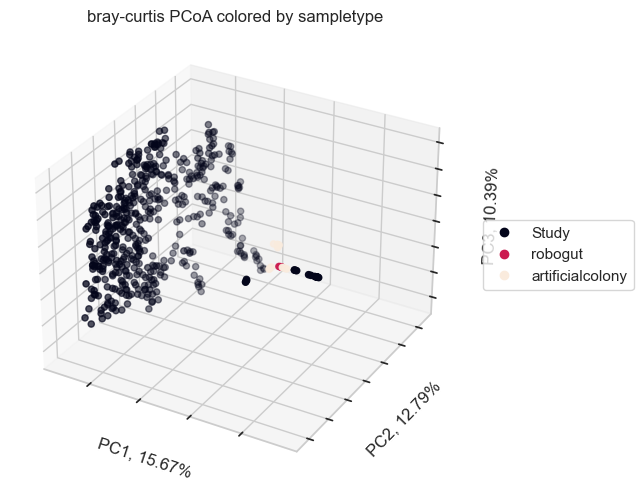

<Figure size 1200x1200 with 0 Axes>

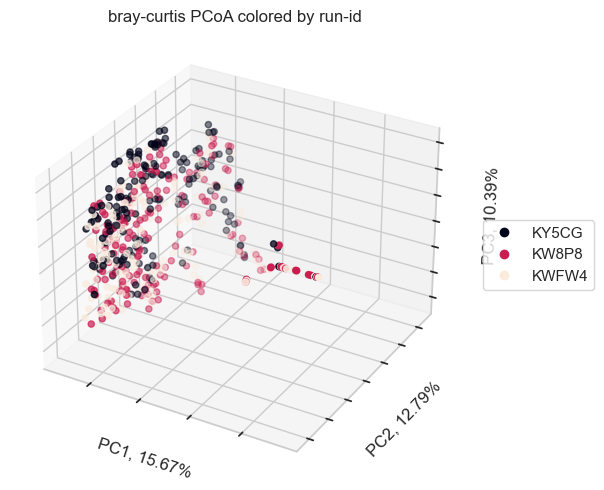

<Figure size 1200x1200 with 0 Axes>

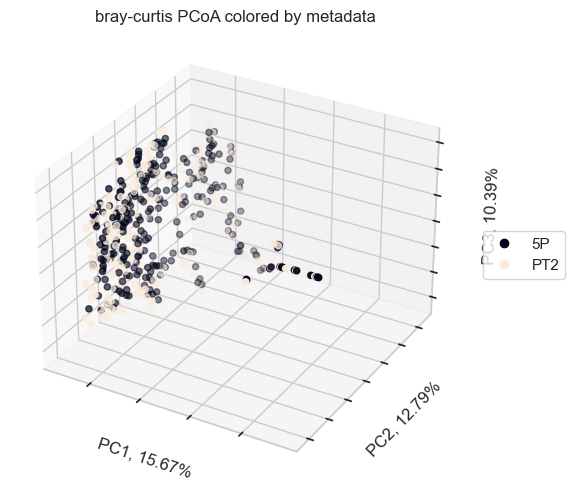

<Figure size 1200x1200 with 0 Axes>

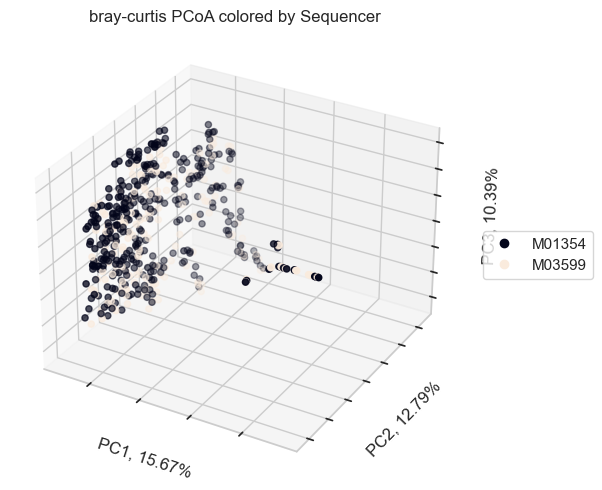

<Figure size 1200x1200 with 0 Axes>

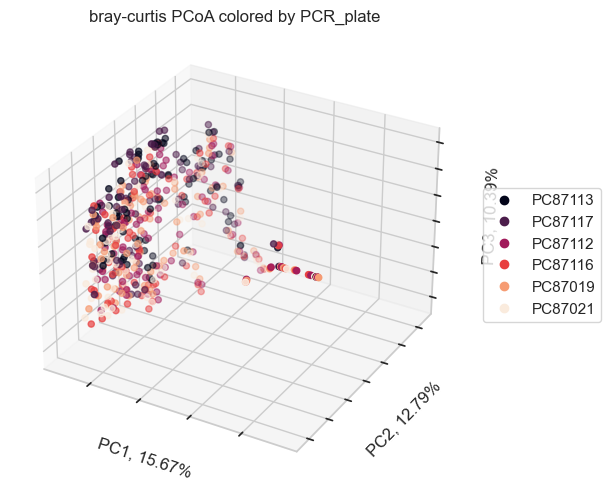

In [21]:
plot_pcoas('bray-curtis')

<h3 id="6.2&nbsp;&nbsp;Jaccard">6.2&nbsp;&nbsp;Jaccard</h3>

<Figure size 1200x1200 with 0 Axes>

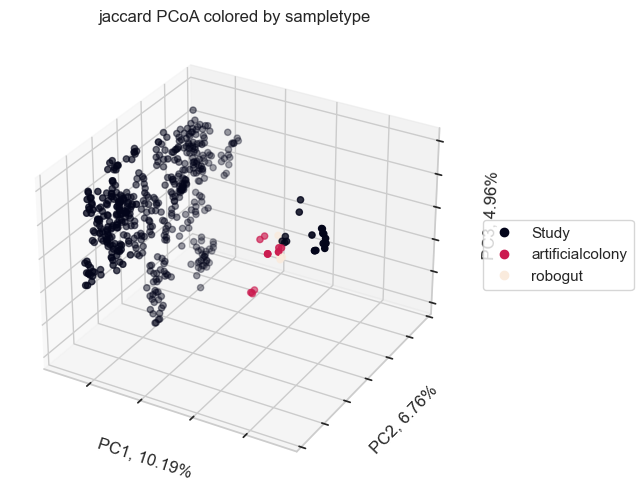

<Figure size 1200x1200 with 0 Axes>

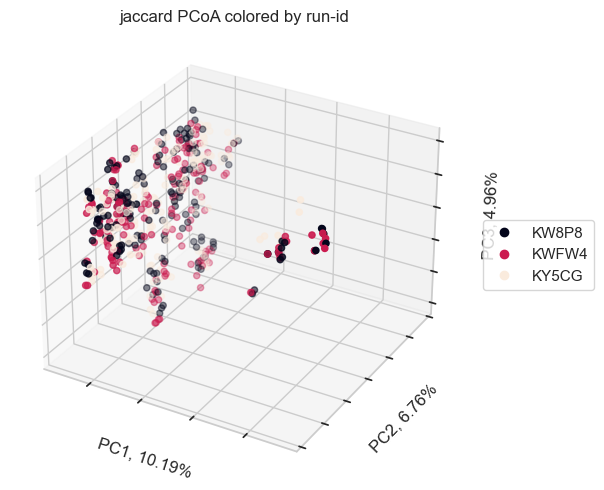

<Figure size 1200x1200 with 0 Axes>

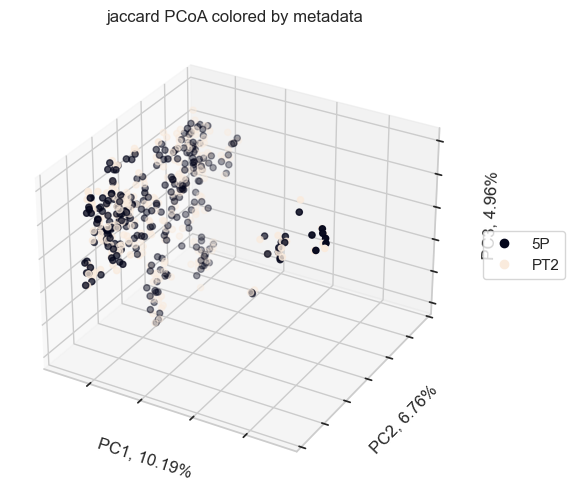

<Figure size 1200x1200 with 0 Axes>

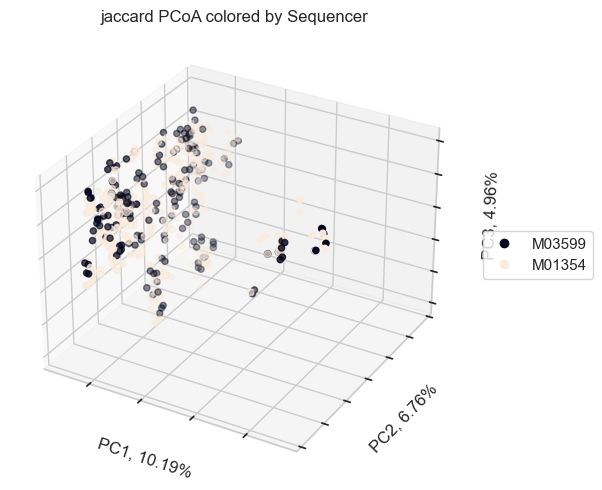

<Figure size 1200x1200 with 0 Axes>

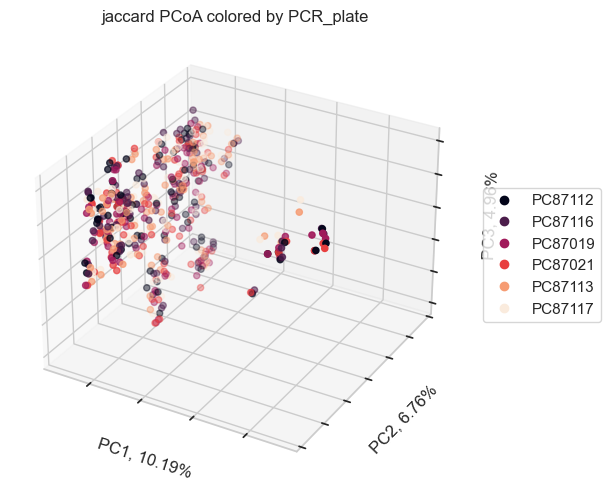

In [22]:
plot_pcoas('jaccard')

<h3 id="6.3&nbsp;&nbsp;Weighted-UniFrac">6.3&nbsp;&nbsp;Weighted UniFrac</h3>

<Figure size 1200x1200 with 0 Axes>

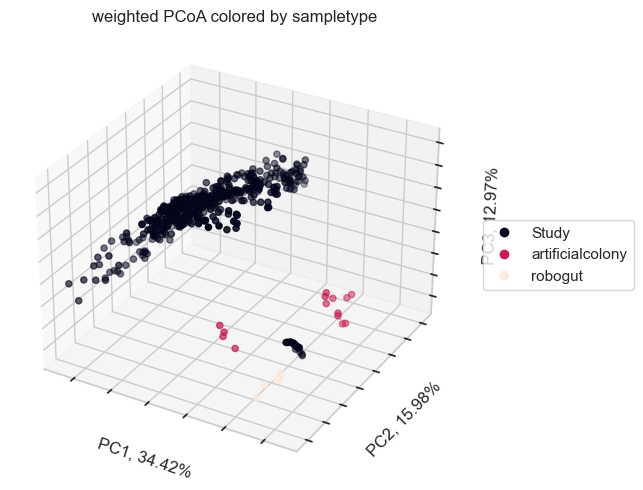

<Figure size 1200x1200 with 0 Axes>

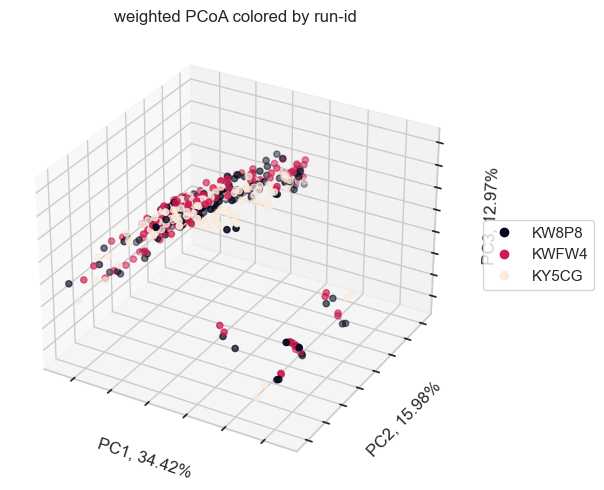

<Figure size 1200x1200 with 0 Axes>

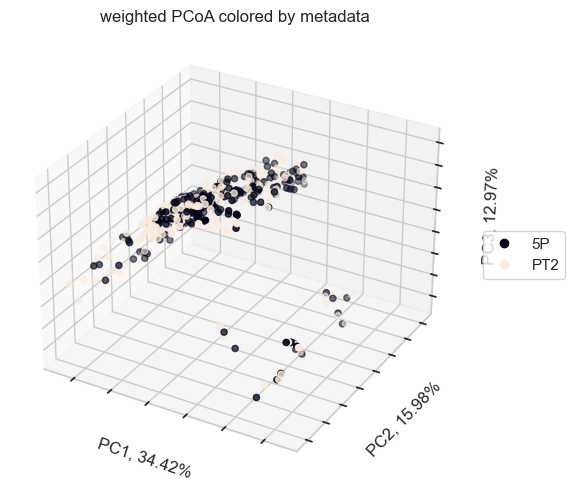

<Figure size 1200x1200 with 0 Axes>

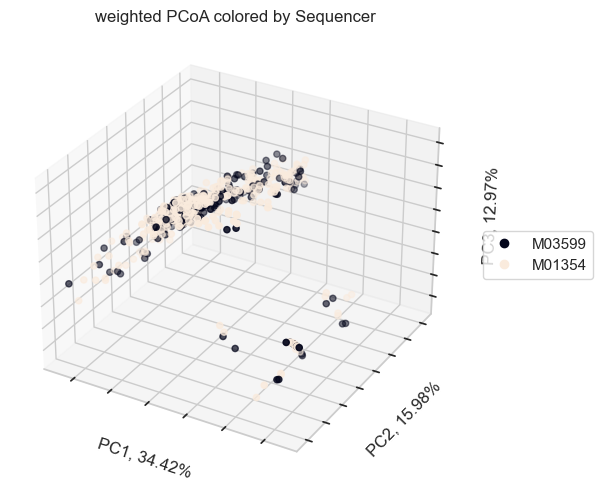

<Figure size 1200x1200 with 0 Axes>

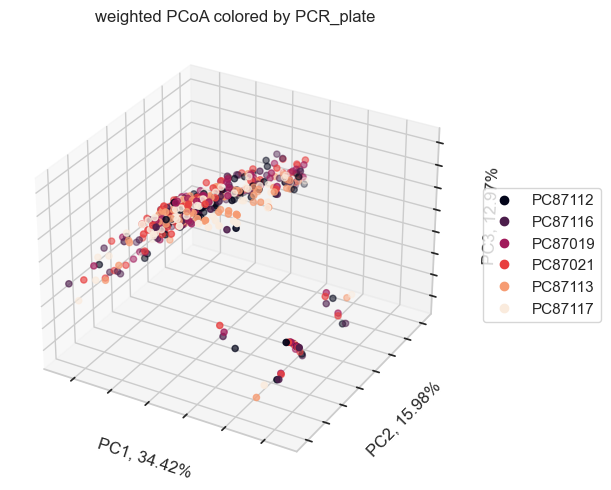

In [23]:
plot_pcoas('weighted')

<h3 id="6.4&nbsp;&nbsp;Unweighted-UniFrac">6.4&nbsp;&nbsp;Unweighted UniFrac</h3>

<Figure size 1200x1200 with 0 Axes>

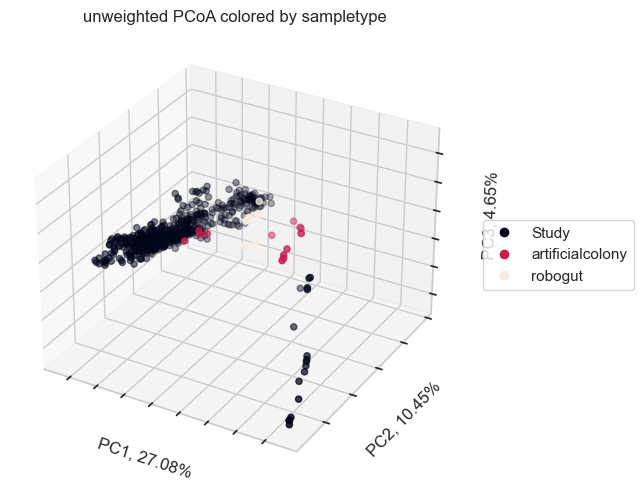

<Figure size 1200x1200 with 0 Axes>

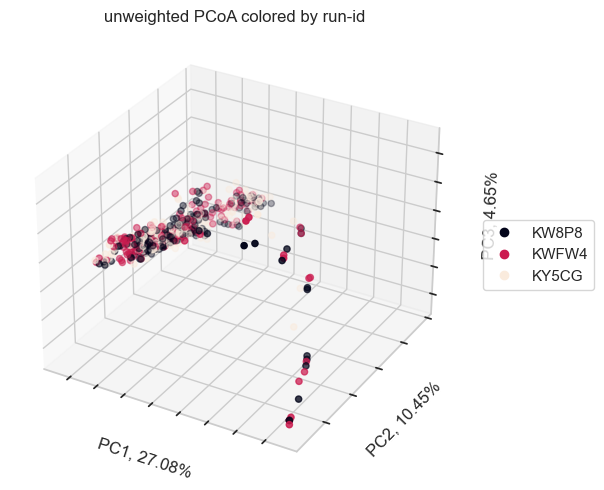

<Figure size 1200x1200 with 0 Axes>

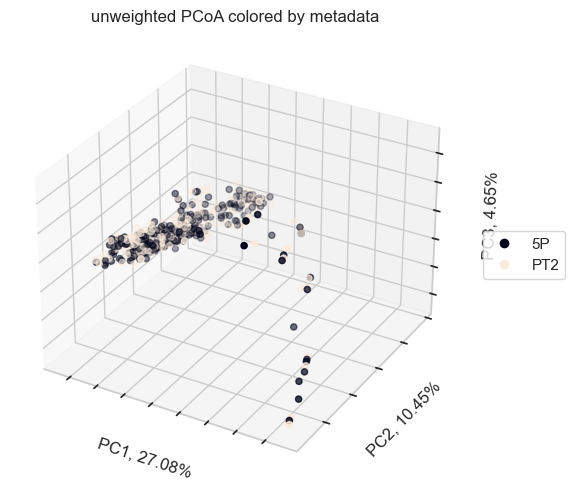

<Figure size 1200x1200 with 0 Axes>

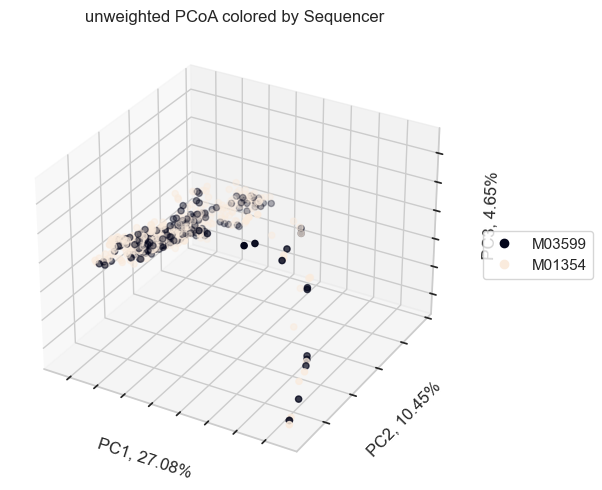

<Figure size 1200x1200 with 0 Axes>

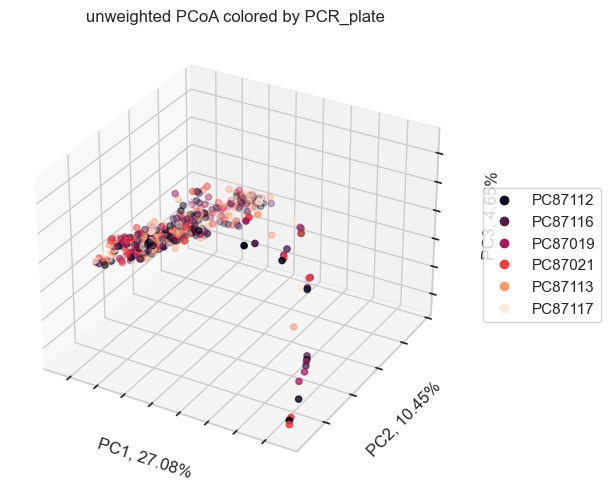

In [24]:
plot_pcoas('unweighted')